# Tarea 2 Machine learning

## Integrantes
Gabriel Molina 201273575-0 | Ignacio Norambuena 201373567-3

### 1. Tipos de fronteras en Clasificación
Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas
maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos (RX). Los
ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es
que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras
que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar
los diferentes tipos.

Éste dataset está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo
ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos de datos es ovalado, generado
a través de una distribución multivariada gaussiana, el otro conjunto de datos es una semi-luna, generado a
través de funciones senos y cosenos. Se agrega ruido en los conjuntos para que no sea un problema trivial. El
código que los genera es el siguiente:

In [20]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from __future__ import print_function

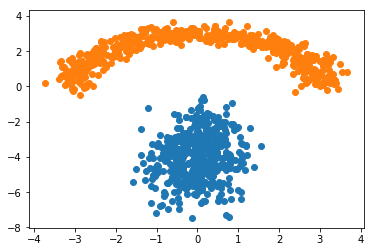

In [21]:
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)
plt.scatter(datos1[:,0], datos1[:,1])
plt.scatter(datos2[:,0], datos2[:,1])
plt.show()

#### (a) Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada conjunto y visualícelos.

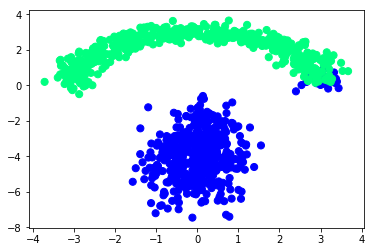

In [22]:
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.winter)
plt.show()

#### Nota:
Como se puede notar, se agregó ruido intencionalmente para simular datos más próximos a la realidad, ya que nunca se encontrarán datos sin ruido o completamente separados

Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente código:

In [23]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()
models = []

#### (b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa.

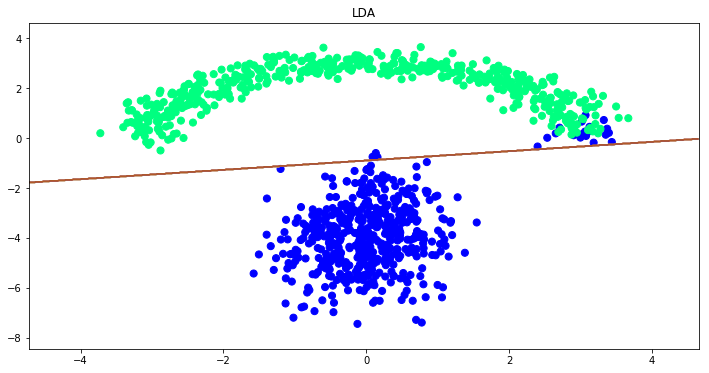

In [24]:
model = LDA()
model.fit(X,y)
yhat_LDA = model.predict(X)
visualize_border(model,X,y,"LDA")
models.append(model)

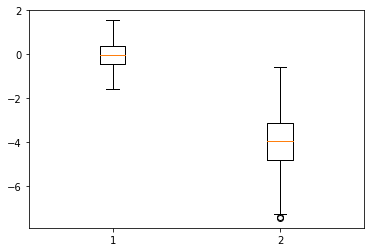

In [25]:
plt.boxplot(datos1)
plt.show()

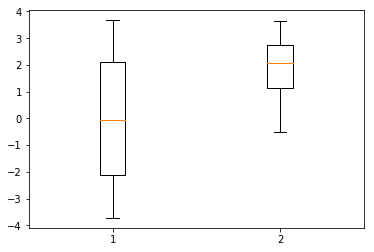

In [26]:
plt.boxplot(datos2)
plt.show()

#### Respuesta
A pesar de que el hiperplano logra separar la gran mayoría de los datos de ambos conjuntos, se puede notar la existencia de datos del conjunto 1 (azul) en el conjunto 2 (verde), por lo cual la separación completa mediante LDA es imposible a menos que trabajemos los datos de una forma mas abrupta.

Lo anterior implica la eliminación de outliers (fácilmente visibles tanto en el gráfico de dispersión como en los boxplot) pero se tiene que tener cuidado de esto, ya que la información mas valiosa puede existir en los outliers y al eliminarlos perdemos una parte importante de información del conjuntos.

#### (c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?


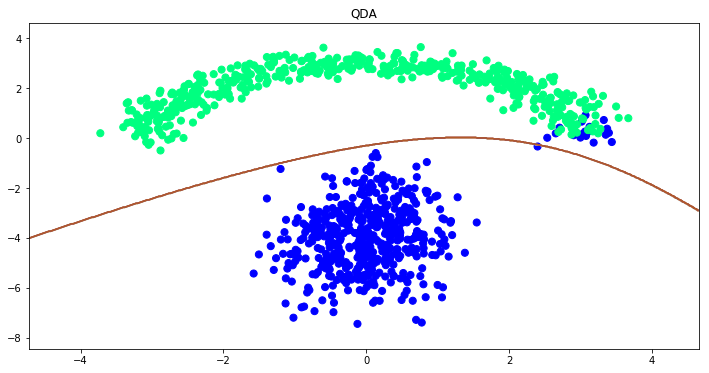

In [27]:
model = QDA()
model.fit(X,y)
yhat_QDA = model.predict(X)
visualize_border(model,X,y,"QDA")
models.append(model)

#### Respuesta
QDA se asemeja a LDA ya que no puede separar completamente los datos de ambos conjuntos, también a pesar de que la curva de división es distinta (ya que usa metodos cuadráticos) la cantidad de puntos es extremadamente similar (quedando mejor clasificado 1 o 2 puntos con QDA).

Por otro lado, por inspección visual se puede decir que QDA se ajusta mejor a la forma del conjunto de datos 2 (verde) por lo cual este tenderá a tener un poco mas overfitting, priorizando la separación en la concentración mas grande de datos, a diferencia de LDA que traza una recta intentando dividir el espacio de ambos conjuntos por "la mitad".

Pero gracias a este trade off, se tiene un clasificador mejor al momento de ingresarle datos nuevos o comprobarlo con datos de testing (los cuales no tenemos por ser datos generados artificialmente).

#### (d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica de error de clasificación.

In [28]:
y_pred_QDA = yhat_QDA
y_pred_LDA = yhat_LDA
y_true = y
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_QDA)))
print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_LDA)))

Miss Classification Loss QDA: 0.019000
Miss Classification Loss LDA: 0.023000


#### Respuesta
Como se puede ver, QDA tiene un mejor desempeño que LDA, esto ocurre por que QDA se adapta mejor al espacio intermedio con forma ovalada, clasificando mejor ciertos puntos que quedan fuera si trazamos una linea recta divisora. Todo esto viene de la mano con el incremento del costo computacional de QDA además del peligro de tener un incremento del overfitting al ajustar la curva divisora a la forma del conjunto de datos 2 (verde)

Para lo que sigue de la actividad se trabajará con una widget interactiva [2] para sintonizar los parámetros
de regularización de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana
se entrenará el modelo y se visualizará la frontera en la misma imagen.


In [29]:
def visualize_border_interactive(param):
    model,yhat = train_model(param)
    visualize_border(model,X,y)
    print("Error de Clasificación: %f"%(1-accuracy_score(y_true, yhat)))


#### (e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma l2), experimente con distintos valores del parámetro de regularización mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [30]:
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 10
interactive(visualize_border_interactive,param=(p_min,p_max,0.0001))

A Jupyter Widget

#### Respuesta

La regresión logística aplicada a la norma l2 penaliza los datos según la regla de Lasso y además la librería nos dice que el parámetro que le ingresamos al modelo es 1/param por lo cual a medida que aumentamos el parámetro que le entregamos a la función, el modelo es menos tolerante a errores y se vuelve más regularizado, esto permite que el modelo se ajuste de mejor forma quitándole importancia a los datos que influyen poco al modelo y siendo poco tolerante a los errores. 

En la pantalla interactiva se denota que el modelo se ajusta hasta un valor máximo del parámetro igual a un valor de 0.6 ya que después de esto el error de clasificación aumenta, por lo cual en este punto se tiene un error de entrenamiento mínimo con un ajuste ideal (bajo el supuesto de que igual ganaremos overfitting, pero como existen muchos datos y no tenemos un conjunto de prueba, haremos caso omiso al overfitting).

#### (f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [31]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 5
interactive(visualize_border_interactive,param=(p_min,p_max,0.0001))

A Jupyter Widget

#### Respuesta
Ya que SVM se encarga de maximizar la mínima distancia entre cada uno de los datos y el hiperplano, por lo cual el parametro cumple la función de que tantos vectores de soporte (o puntos) escojo para calcular mi hiperplano, por lo cual a un mayor parametro (recordamos que la función lo implemente como 1/param) el modelo tiende a castigar los errores del shift haciendo que el hiperplano se mueva hacia el ruido en el conjunto verde y en el caso opuesto ignora este ruido y intenta cortar casi horizontalmente los dos conjuntos de datos.
Al igual que la regresión logística el parametro óptimo esta en un rango de 0.6 y pasado un valor de aproximadamente 2, la regularización se estanca, ya que puede castigar mas los errores

#### (g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal. Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [32]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y) 
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 10
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

A Jupyter Widget

In [33]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 1000000
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

A Jupyter Widget

In [34]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='sigmoid')
    model.fit(X,y)
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 0.01
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max,0.001))

A Jupyter Widget

#### Respuesta

1. Polinomial: Este kernel hace que el parametro C ajuste el polinomio de la separación óptima de ambos conjuntos de datos (Vídeo que explica visualmente muy bien este kernel: https://www.youtube.com/watch?v=3liCbRZPrZA). Para este kernel el punto óptimo donde se disminuye el error es param = 0.7 (Considerando que aun se tiene overfitting) y además desde un valor de param = 2 aproximadamente, el hiperplano pasa de ser polinomial a lineal ya que posiblemente la restricción se vuelve irrelevante al estar muy alejada al espacio de soluciones.
2. Radial Basic Function: Este kernel encierra el conjunto de datos comparándolos uno por uno y el parámetro castiga el radio de estas separaciones, por lo cual al aumentar el parámetro el modelo normalmente tenderá a tener un menor error, pero incrementará considerablemente el overfitting ya que se estará ajustando muy perfectamente a los datos de entrenamiento. También se debe destacar que a medida que aumentamos el parámetro, SVM con kernel rbf va  encapsulando el conjunto de datos verde y a valores muy bajos del parámetro, la máquina es menos castigadora con los errores, ignorando completamente el shift y encapsulando el conjunto azul.
3. Sigmoid: El kernel de Sigmoid o de tangente hiperbólica viene del modelo de las redes neuronales, el cual se denota por la siguiente fórmula: $$k(x, y) = tanh (\alpha x^T y + c)$$A pesar de que da buenos resultados, las fronteras tienen un comportamiento extraño a medida que se varia el parámetro regularizador, por lo cual se presume que para que sea un buena aproximación para la solución, se tendrá que correr un algoritmo que encuentre el parámetro regularizador ideal de este conjunto (sin asumir overfitting por la cantidad de datos)




#### (h) Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [35]:
def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

In [36]:
def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X,y) 
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 20
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

#### Respuesta
Para este ejercicio, se utilizaron el modelo de impureza de Gini y el de ganancia de información (Entropy), el parámetro regularizador simboliza cuantas separaciones se tendrán en el modelo de árbol de decisión el cual permite una mayor profundización del árbol dependiendo de su valor.

Para ambos modelos, cuando la profundidad máxima del árbol es igual a 11 se tiene un 0% de error de clasificaciones, lo cual significa que se logra separar completamente ambos conjuntos de datos, pero esto no significa que la maquina sea ideal, ya que como se puede ver visualmente la separaciones es muy estrecha en los datos verdes, lo cual significa que el modelo esta sumamente overfiteado lo cual podría tener efectos horribles al ingresar datos nuevos.

#### (i) Construya un algoritmo k-NN para la clasificación del problema. Mediante la imagen interactiva explore diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [37]:
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    models.append(model)
    yhat = model.predict(X)
    return model,yhat
p_min = 1
p_max = 100
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

#### Respuesta
La fase de entrenamiento del algoritmo consiste en almacenar los vectores característicos y las etiquetas de las clases de los ejemplos de entrenamiento. En la fase de clasificación, la evaluación del ejemplo (del que no se conoce su clase) es representada por un vector en el espacio característico. Se calcula la distancia entre los vectores almacenados y el nuevo vector, y se seleccionan los k ejemplos más cercanos. El nuevo ejemplo es clasificado con la clase que más se repite en los vectores seleccionados.

KNN busca localmente los K vecinos mas cercanos, lo cual se define mediante el parámetro. Para este caso, con solamente tomar K=1 se tiene un error de clasificación del 0% lo que demuestra el éxito de mi separación y si el parámetro K aumenta de valor, este incrementando mi error de clasificación hasta un 2%, por lo cual para evitar el overfitting causado por k=1 se debería aumentar el valor de K hasta tener un modelo con un error de clasificación relativamente bueno pero que visualmente deje espacio para nuevos datos (disminuya el overfitting). En este caso, el valor k = 18 deja una división con un error de clasificación bastante bajo, además de que mantiene en "el medio del hiperplano" datos de ambos conjuntos, lo cual disminuye considerablemente el overfitting.

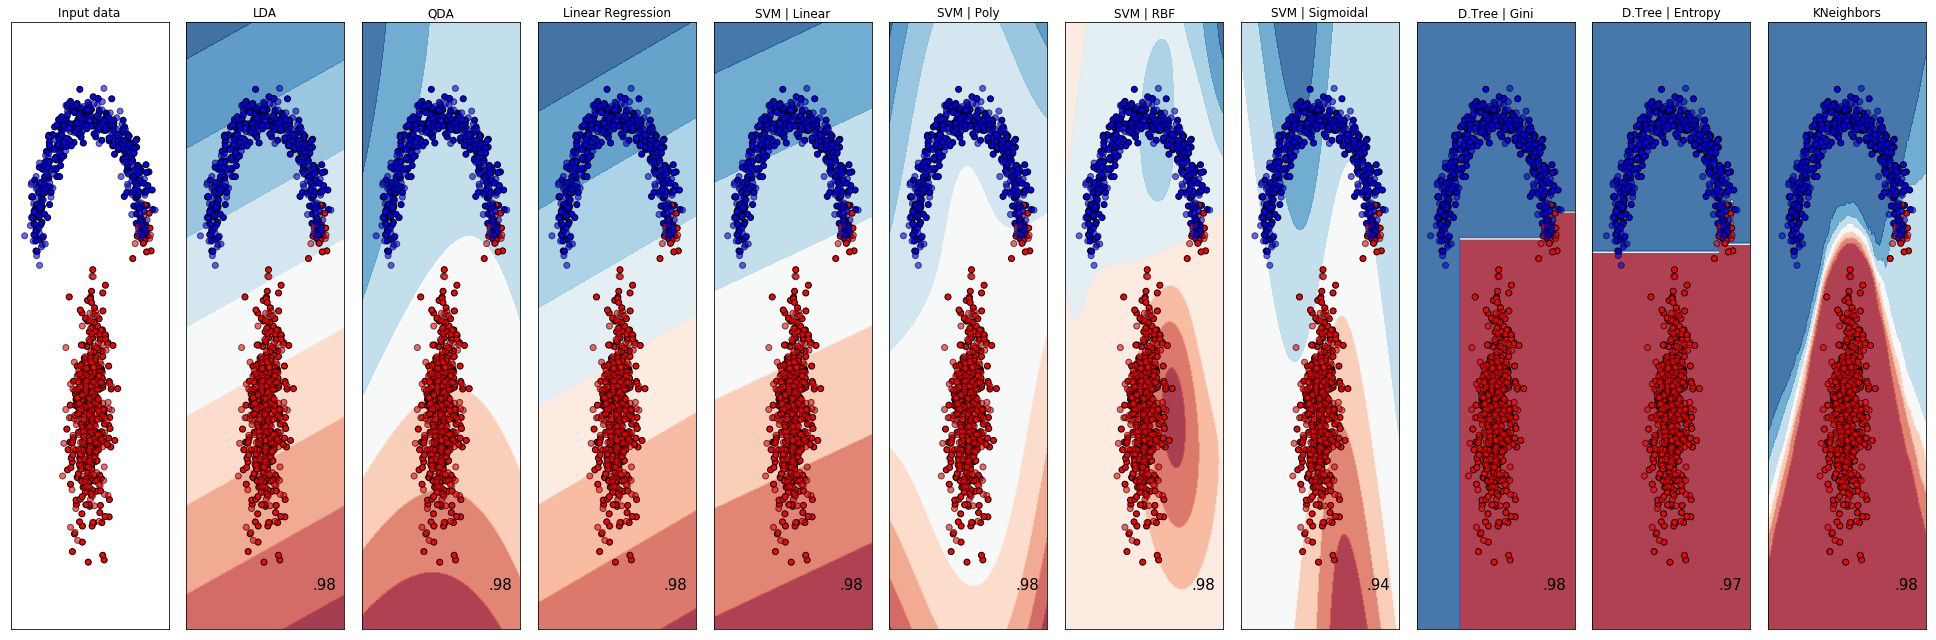

In [38]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def compare(X, y, classifiers):
    h = .02  # step size in the mesh
    
    names = ["LDA", "QDA", "Linear Regression", "SVM | Linear",
    "SVM | Poly", "SVM | RBF", "SVM | Sigmoidal", "D.Tree | Gini",
    "D.Tree | Entropy", "KNeighbors"]
    
    datasets = [(X,y)]
    
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)
    
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
    
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
    
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()  

compare(X,y,models)

### 2. Análisis de audios como datos brutos


In [20]:
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pylab 
import scipy.stats as stats
from mpl_toolkits.axes_grid.inset_locator import inset_axes

%matplotlib inline

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [21]:
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b


#### (a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay por clase.


In [22]:
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [23]:
df['label'].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

#### Respuesta

Como se puede apreciar:
1. el dataset cuenta con 176 filas y 4 columnas
2. "dataset" representa el dataset (a o b) al cual corresponde el dato
3. "fname" es el nombre del archivo de audio al cual corresponde el dato
4. "label" corresponde a la etiqueta a la cual corresponde el dato, en los cuales puede ser normal, artifac, extrahis, murmur o puede venir sin clasificar
5. "sublabel" columna que no contiene información

Las etiquetas significan lo siguiente:

1. Normal: Sonido Normal del corazón
2. Murmur: Corresponde a un soplo el cual se reconoce por sonidos turbulentos
3. artifac: Variedad de sonido que en el cual no necesariamente se escuchan sonidos cardiacos, ej: silbidos, llantos
4. extrahis: Sonido extra aparte del corazón 

Por ultimo, la cantidad de datos en cada etiqueta es:

    unlabel     52
    artifact    40
    murmur      34
    normal      31
    extrahls    19

In [24]:
df.drop(['dataset','sublabel'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante

#### (b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

In [25]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux


new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_df.head()

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


#### Dato
Para poder analizar una secuencia de audio, al igual que los datos en matrices mult-idimensionales, los datos deben estar en la misma escala, es decir, estandarizar los datos, por lo cual el padding de 0 estandariza los datos haciendo que todos tengan el mismo tamaño de serie de tiempo, facilitando los trabajos futuros.

#### (c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4], el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

In [26]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


normal/extrahls    65
artifact           58
murmur             53
Name: target, dtype: int64

artifacts:


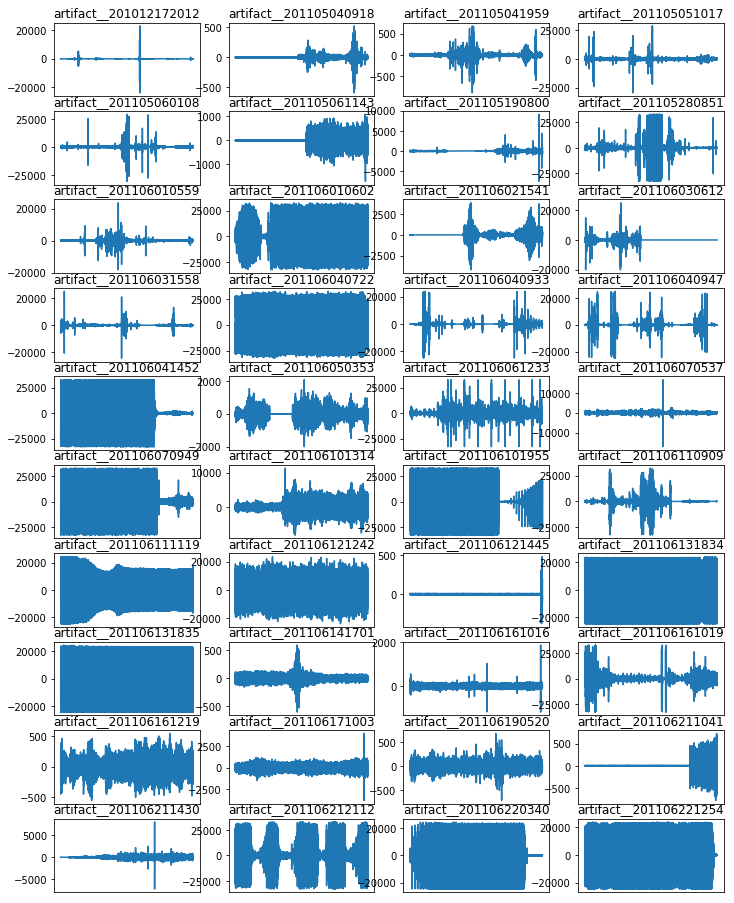

In [27]:
print("artifacts:")
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(new_df['time_series'][i])
    ax[i//4, i%4].set_title(new_df['file_name'][i][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

extrahls:


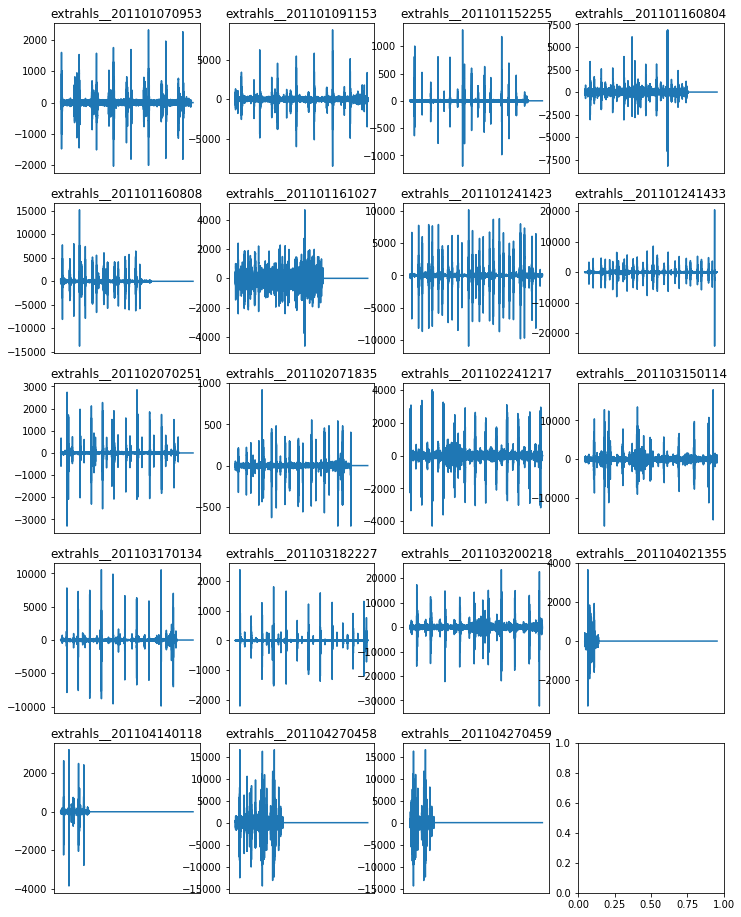

In [28]:
print("extrahls:")
fig, ax = plt.subplots(5, 4, figsize = (12, 16))
for i in range(19):
    ax[i//4, i%4].plot(new_df['time_series'][i+40])
    ax[i//4, i%4].set_title(new_df['file_name'][i+40][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

murmur


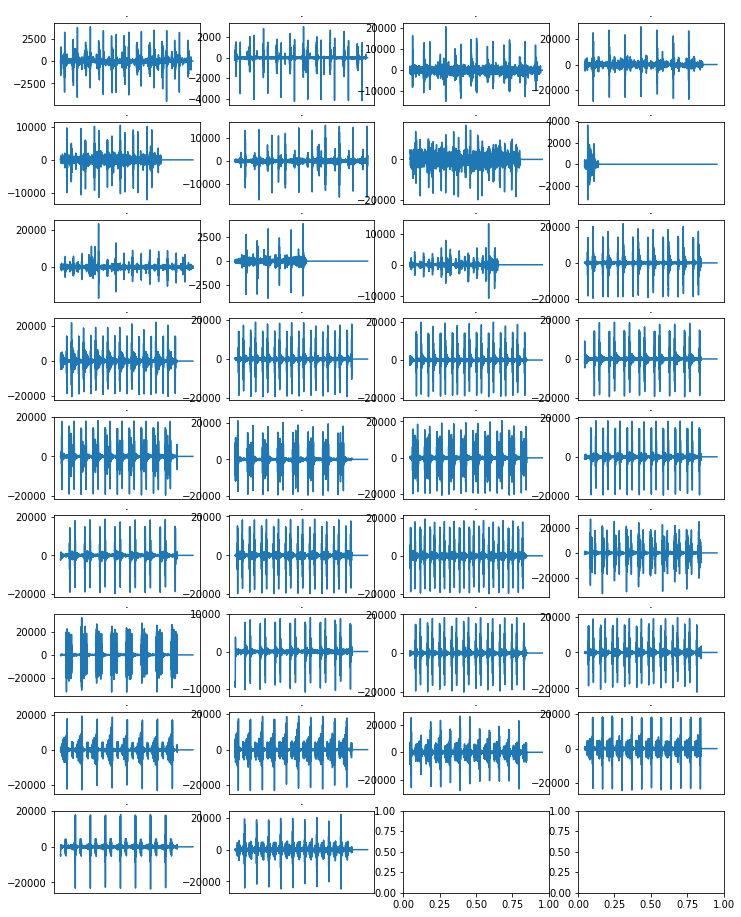

In [29]:
print("murmur")
fig, ax = plt.subplots(9, 4, figsize = (12, 16))
for i in range(34):
    ax[i//4, i%4].plot(new_df['time_series'][i+59])
    ax[i//4, i%4].set_title(new_df['file_name'][i+59][-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

normal


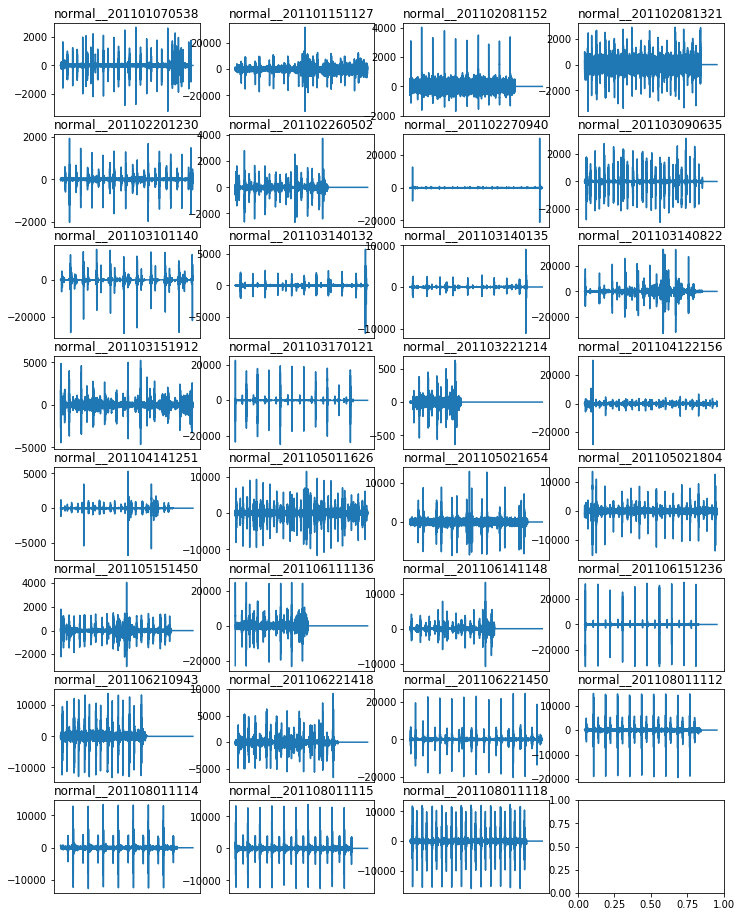

In [30]:
print("normal")
fig, ax = plt.subplots(8, 4, figsize = (12, 16))
for i in range(31):
    ax[i//4, i%4].plot(new_df['time_series'][i+93])
    ax[i//4, i%4].set_title(new_df['file_name'][i+93][:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

unclassified


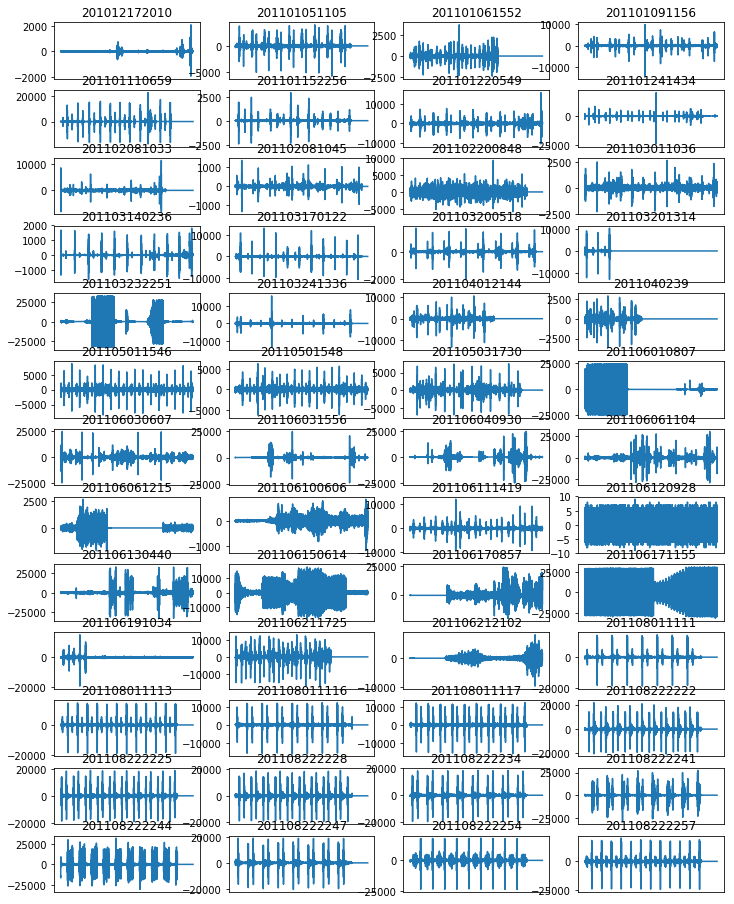

In [31]:
print("unclassified")
fig, ax = plt.subplots(13, 4, figsize = (12, 16))
for i in range(52):
    ax[i//4, i%4].plot(new_df['time_series'][i+124])
    ax[i//4, i%4].set_title(new_df['file_name'][i+124][17:-4])
    ax[i//4, i%4].get_xaxis().set_ticks([])

#### Respuesta

Como se puede observar, se tiene normal/extrahls, artifact y murmur tienen 65, 58 y 53 entradas por clase correspondientemente. Cuando se tiene datos mal clasificados, la máquina tiene aprender cosas que no tienen sentido, afecta la precisión de mi máquina. 

Además, si tengo suficientes datos y mi modelo es robusto a la existencia de "Label Noise" 1 solo dato mal etiquetado no debería causar muchos problemas en el aprendizaje de mi máquina, por otro lado, si mi modelo no es robusto ante este ruido, es decir, no tengo adaptado al modelo para que permita los errores de etiquetado en los datos de entrenamiento, 1 solo dato mal etiquetado en la combinación de una cantidad no muy amplia de datos de entrenamiento, puede afectar considerablemente mi máquina.

Esto se puede solucionar generando un modelo resistente a los errores de etiquetado o el método más común es que manualmente se depuran los datos mal etiquetados, ya sean dándole su etiqueta correcta, haciendo un sistema de votos en comunidad o borrando el dato.

En este ejemplo, todos los datos fueron re etiquetados por un experto, esto tiene un problema, la máquina al ser entrenada con datos mejor etiquetados, podrá tener un mejor resultado pero la máquina posiblemente obtenga un gran overfitting ya que los datos de entrenamiento estarán sesgados a la vista de este experto y al momento de ingresar datos nuevos esto puede generar un gran error de clasificación.

#### (d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos clasificadores.


In [32]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
df.shape
df.info()
new_df['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
fname    176 non-null object
label    124 non-null object
dtypes: object(2)
memory usage: 2.8+ KB


2    65
0    58
1    53
Name: target, dtype: int64

#### Observación

Como se denota en la información del data set, los valores de normal/extrahls, artifact, murmur fueron cambiados a los valores numéricos 2, 0 y 1 respectivamente

#### (e) Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?


In [33]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

#### Respuesta

Al tener los datos sin su pre-procesamiento se tienen los siguientes problemas:

1. Al tener los datos en diferentes  amplitudes de tiempo se genera problema al trabajar con los datos, ya que al no tenerlos en la misma escala no podre ajustar mi modelo correctamente y el trabajo futuro se vuelve muy complicado.
2. Las diferentes dimensiones implica caer en la maldición de la dimensionalidad, la cual tiene varios factores, algunos de ellos son la perdida de la noción de distancia, la complejidad humana de pensar en soluciones en mas de 3+1 dimensiones, entre otros.

#### (f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.


In [34]:
X_fourier = np.abs(np.fft.fft(X))
X

array([[  -85.,  -198.,  -214., ...,  -110.,   -74.,   -76.],
       [   96.,    90.,    84., ...,     0.,     0.,     0.],
       [  220.,   191.,   171., ...,     0.,     0.,     0.],
       ..., 
       [  376.,   413.,   429., ...,     0.,     0.,     0.],
       [ -404.,  -442.,  -456., ...,     0.,     0.,     0.],
       [-2169., -2661., -1605., ...,   435.,   373.,   417.]])

#### (g) Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar si el muestro es representativo?


In [35]:
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

In [36]:
X_trainFULL, X_testFULL, y_trainFULL, y_testFULL = train_test_split(X_fourier, y,test_size=0.25, random_state=42)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

In [38]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_trainFULL)
X_trainFULL = std.transform(X_trainFULL)
X_testFULL = std.transform(X_testFULL)

In [39]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [40]:
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

In [41]:
d=2
pca_modelFULL = PCA(n_components=d)
pca_modelFULL.fit(X_trainFULL)
X_pca_trainFULL = pca_modelFULL.transform(X_trainFULL)
X_pca_testFULL = pca_modelFULL.transform(X_testFULL)

#### Respuesta
Existen muchas formas para verificar si el conjunto es representativo, en estos momentos utilizaremos una forma visual de comparación. Para este caso analizaremos las curvas de error al entrenar una máquina de Regresión Logística con penalización l2, SVM con kernel lineal y SVM con kernel rbf para el conjunto de datos completos y lo compararemos con el conjunto de datos reducido (que se muestra en los siguientes ejercicios). Además podremos ver el ploteo del conjunto de datos total al reducirlos con PCA a 2 dimensiones y tambien lo compararemos con el conjunto reducido.

De lo anterior, se observa que ambos modelos siguen el mismo comportamiento al usarlos de entrenamiento para las distintas máquinas, ambas máquinas tienen curvas sumamente similares al jugar con un parámetro regularizador y al graficar los datos se observan comportamientos similares, por ejemplo que la mayoría de los datos esta sumamente centrado en el 0.

Otro punto positivo de esta parte de la tarea es que podemos graficar los errores de entrenamiento y testing de ambos conjuntos (completo y reducido) y podemos observar que con el subconjunto generaliza mas la máquina entrenada (y además genera un menor error), permitiendo una ventana mas grande a los datos que ingresen a futuro.

Otro detalle es que los algoritmos que usan el dataset completo tardan mucho mas en graficar la solución

#### (h) Genere un conjunto de pruebas mediante la técnica hold-out validation para verificar la calidad de los clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,test_size=0.25, random_state=42)

In [43]:
X_train.shape

(132, 100000)

In [44]:
X_test.shape

(44, 100000)

In [45]:
print("El conjunto de entrenamiento tiene " + str(len(X_train)) + ' datos')
print('El conjunto de entrenamiento prueba ' + str(len(X_test)) +' datos')
print('Ambos conjuntos de entrenamiento cuenta con 100000 dimensiones')

El conjunto de entrenamiento tiene 132 datos
El conjunto de entrenamiento prueba 44 datos
Ambos conjuntos de entrenamiento cuenta con 100000 dimensiones


#### (i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [46]:
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

#### (j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.


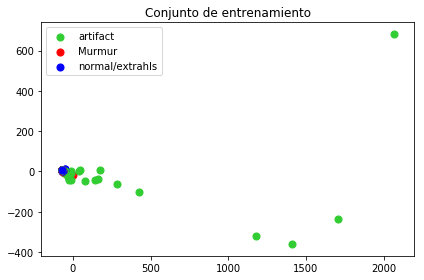

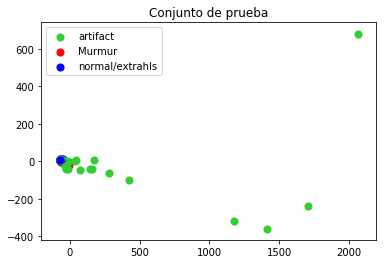

In [47]:
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.title('Conjunto de entrenamiento')
plt.tight_layout()
plt.show()

for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.title('Conjunto de prueba')
plt.show()


#### Diferentes Zooms al Dataset Reducido

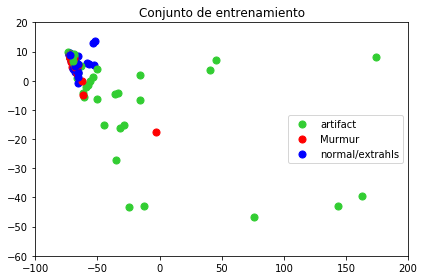

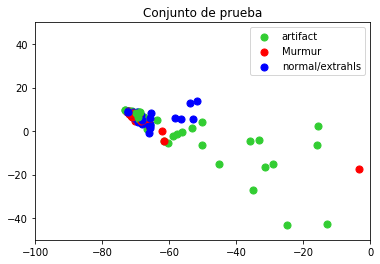

In [48]:
for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.title('Conjunto de entrenamiento')
plt.axis([-100,200,-60,20])
plt.tight_layout()
plt.show()

for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.axis([-100,0,-50,50])
plt.title('Conjunto de prueba')
plt.show()

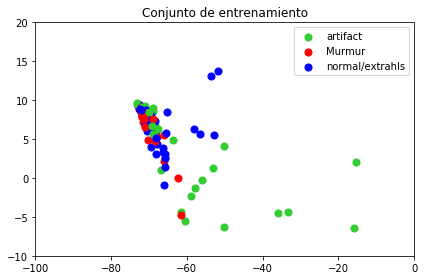

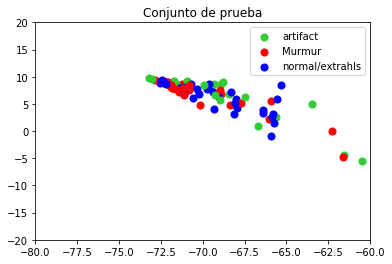

In [49]:
for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.title('Conjunto de entrenamiento')

plt.axis([-100,0,-10,20])
plt.tight_layout()
plt.show()

for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.axis([-80,-60,-20,20])

plt.title('Conjunto de prueba')
plt.show()

#### (k) Entrene un modelo de Regresión Logística variando el parámetro de regularizacion C construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion C en el mismo rango que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.

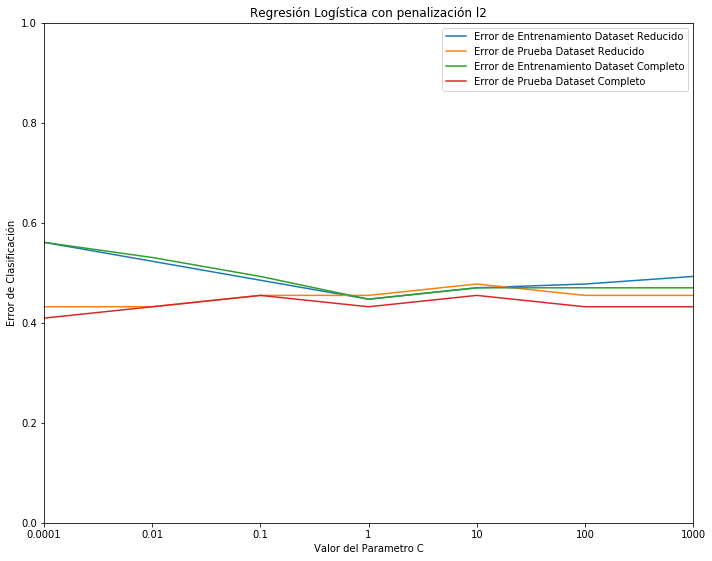

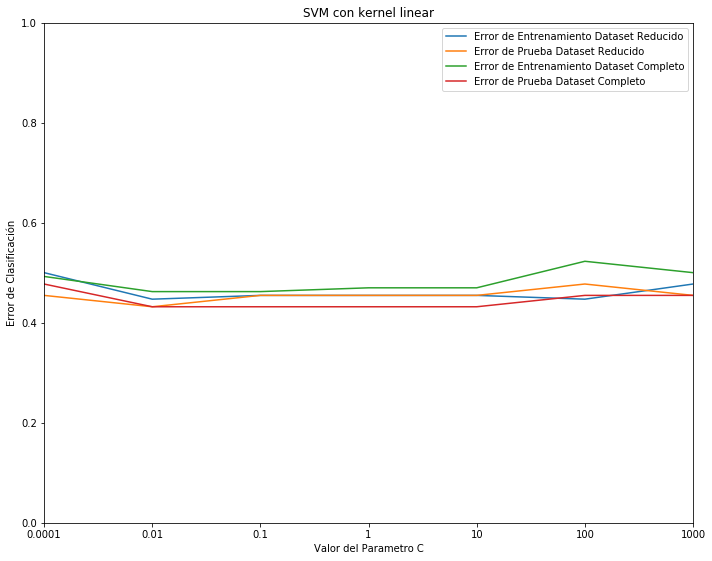

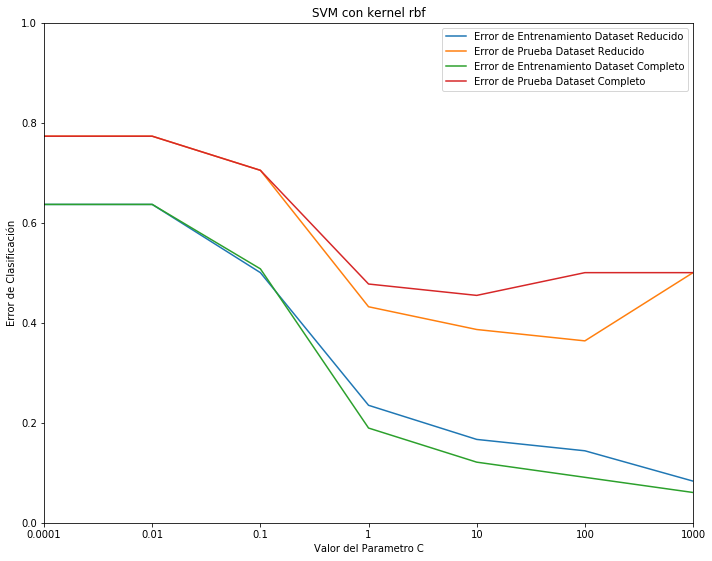

In [50]:
def ploteo_k(Cs, modelo,X_pca_train,X_pca_test,y_train,y_test,kernel): 
    error_train = []
    error_test = []
    error_trainFULL = []
    error_testFULL = []
    
    
    pasos = [1,2,3,4,5,6,7]
    Cs = [0.0001,0.01,0.1,1,10,100,1000]
    for i,param in enumerate((0.0001,0.01,0.1,1,10,100,1000)):
        if(modelo == 1):
            model=LR()
            model.set_params(C=param,penalty='l2')
            model.fit(X_pca_train,y_train)
            
            modelFULL=LR()
            modelFULL.set_params(C=param,penalty='l2')
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        if(modelo ==2):
            model = SVM()
            model.set_params(C=param,kernel=kernel)
            model.fit(X_pca_train,y_train)
            
            modelFULL = SVM()
            modelFULL.set_params(C=param,kernel=kernel)
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))

    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(pasos, error_test, label='Error de Prueba Dataset Reducido')
    
    plot.plot(pasos, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(pasos, error_testFULL, label='Error de Prueba Dataset Completo')
    plt.legend()
    if(modelo == 1):
        plt.title('Regresión Logística con penalización l2')
        plt.ylim(0, -0.4)
    if(modelo == 2):
        plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()
        
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],1,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'rbf')

#### Comparación:

Las características de cada gráfico son:

1. Para LR con penalty L2 (Gráfico 1), se tiene que el error de entrenamiento decrece a medida que el error de prueba aumenta hasta cierto punto y luego decrece nuevamente, esto se debe a que entre mas pequeño el parámetro regularizador, la máquina es menos tolerante a errores. Por otro lado, existe un punto en el cual a pesar de estar poco regularizada, el error de entrenamiento y de prueba es sumamente bajo, por lo cual se estima que para este modelo, se deberá regularizar lo menos posible para encontrar resultados óptimos.

2. Para SVM con kernel lineal (Gráfico 2), se tiene un comportamiento similar a LR ya que el punto donde la máquina tiene el mejor comportamiento es cuando apenas se regulariza, por lo cual se tendrá que regularizar muy poco la máquina para encontrar los resultados óptimos. Lo interesante va en los extremos ya que por ejemplo, al no regularizar la máquina, en cierto punto el error de prueba disminuye considerablemente a pesar de que el error de entrenamiento es alto en comparación al resto de las pruebas.

3. para SVM con kernel Radial (Gráfico 3), la máquina tiene sus resultados óptimos para un parámetro regularizador igual a 100 (aproximadamente),por lo cual se presume que para este caso, la mejor opción sea no regularizar o regularizar extremadamente poco ya que si no se caerá en el caso de overfitting (ya que el mejor desempeño es aproximadamente en el valor del C = 1 y superior a eso se cae en el overfitting), 

#### Conclusión:

Para los 3 experimentos se tiene que la regularización no trae muy buenos resultados, por lo cual regularizar lo mas mínimo o encontrar exactamente el valor del parámetro de regularización es la aproximación a llevar para mejorar el modelo y disminuir el overfitting. Además, por el análisis visual y de comportamiento según el parámetro C en el primer y segundo gráfico, se concluye que SVM con un kernel lineal tiene un comportamiento casi igual a regresión logística.



#### (l) Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro regularizador max depth, construyendo un gráfico resumen del error en función de este parámetro. Compare con los modelos anteriores.

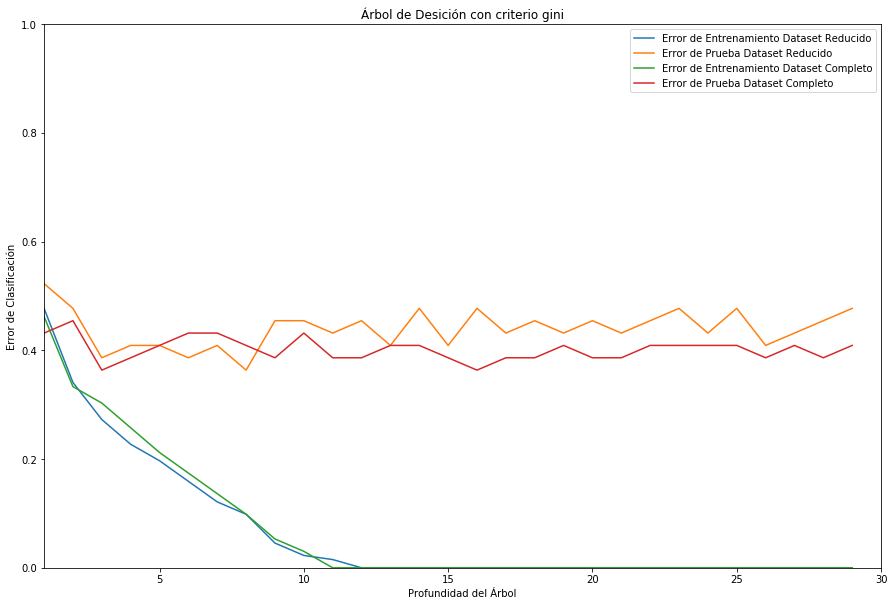

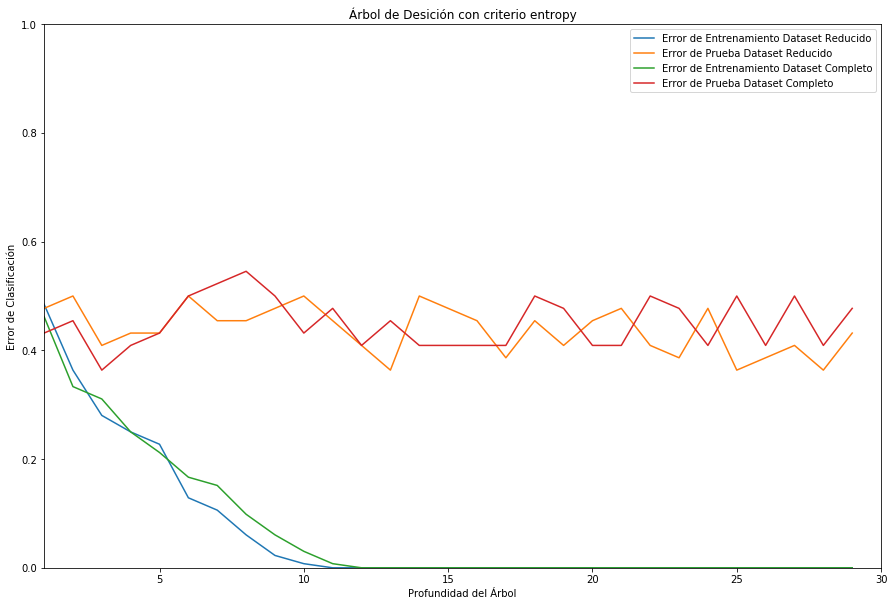

In [51]:
def plot_i(minimo, maximo,criterio):
    profundidad = range(minimo,maximo)
    error_train= []
    error_test = []
    error_trainFULL= []
    error_testFULL = []
    
    for c in profundidad:
        model= Tree()
        model.set_params(max_depth=c,criterion=criterio,splitter='best')
        model.fit(X_pca_train,y_train)
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        modelFULL= Tree()
        modelFULL.set_params(max_depth=c,criterion=criterio,splitter='best')
        modelFULL.fit(X_pca_trainFULL,y_trainFULL)
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))
        
        
        
    plt.figure(figsize=(15,10))
    plot = plt.subplot(1,1,1)
    plot.plot(profundidad, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(profundidad, error_test, label='Error de Prueba Dataset Reducido')
    plot.plot(profundidad, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(profundidad, error_testFULL, label='Error de Prueba Dataset Completo')
    
    plt.legend()
    plt.xlabel('Profundidad del Árbol')
    plt.ylabel('Error de Clasificación')
    plt.title('Árbol de Desición con criterio ' + criterio)
    plt.axis([minimo,maximo,0.0, 1])

    plt.show()
plot_i(1,30,'gini')
plot_i(1,30,'entropy')

#### Comparación

La diferencia entre los anteriores modelos (SVM, LR) en comparaciones a arboles de decisión es muy grande. Arboles de decisión en machine learning se basa en dividir en dos subsecciones conveniente mis datos para tener conjuntos mas pequeños(esto repetido una N cantidad de veces, donde N es el nivel de mi árbol). Para nuestro caso, si tomamos una profundidad de 30, el error de entrenamiento disminuye a 0 desde un valor de profundidad 11 en adelante, esto quiere decir que al llegar a una profundidad de 11 la máquina trae un gran overfitting, ya que solamente disminuye el error de entrenamiento pero el error de prueba se mantiene constante (si toamos el promedio de las mediciones se aproxima a una recta).

Respecto a las diferencias de SVM y LR es observable que no se logra disminuir considerablemente el error de prueba, por lo cual si presume un aumento del overfitting en la máquina a medida que aumenta la profundidad del árbol.

Por lo cual se concluye que arboles de decisión no es una buena técnica para este ejercicio, ya que no se logra disminuir el error de prueba ni con el método de máxima entropía ni con gini, por lo cual se recomienda usar otro método de entrenamiento.

#### (m) Experimente con diferentes dimensiones d para la proyección de PCA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen.


In [52]:
def plot_m(dimension,modelo,C_regularizador,kernels,profundidad):
    error_train = []
    error_test = []
    
    error_trainFULL = []
    error_testFULL = []

    
    dimensiones_auxiliar = range(1,dimension)
    arreglo_dimensiones = []
    if(modelo == 1):
        model=LR()
        model.set_params(C=C_regularizador,penalty='l2')
        
        modelFULL=LR()
        modelFULL.set_params(C=C_regularizador,penalty='l2')
        
    if(modelo == 2):
        model = SVM()
        model.set_params(C=C_regularizador,kernel=kernels)
        
        modelFULL = SVM()
        modelFULL.set_params(C=C_regularizador,kernel=kernels)
        
    if(modelo == 3):
        model= Tree()
        model.set_params(max_depth=profundidad,criterion=kernels,splitter='best')    
        
        modelFULL= Tree()
        modelFULL.set_params(max_depth=profundidad,criterion=kernels,splitter='best')   
        
    for dimensiones in range(1,dimension):
        pca_model = PCA(n_components=dimensiones)
        pca_model.fit(X_train)
        X_pca_train = pca_model.transform(X_train)
        X_pca_test = pca_model.transform(X_test)
        model.fit(X_pca_train,y_train)
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        pca_modelFULL = PCA(n_components=dimensiones)
        pca_modelFULL.fit(X_trainFULL)
        X_pca_trainFULL = pca_modelFULL.transform(X_trainFULL)
        X_pca_testFULL = pca_modelFULL.transform(X_testFULL)
        modelFULL.fit(X_pca_trainFULL,y_trainFULL)
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))
        arreglo_dimensiones.append(dimensiones)
        
    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    
    plot.plot(arreglo_dimensiones, error_train, label='Error de Entrenamiento Dataset Reducido ')
    plot.plot(arreglo_dimensiones, error_test, label='Error de Prueba Dataset Reducido')
    
    plot.plot(arreglo_dimensiones, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(arreglo_dimensiones, error_testFULL, label='Error de Prueba Dataset Completo')
    
    plt.legend()
    if(modelo == 1):
        plt.title('Regresión Logística con penalización l2')
    if(modelo == 2):
        plt.title('SVM con kernel '+kernels)
    if(modelo == 3):
        plt.title('Arboles con criterio '+kernels)
    plt.xlabel('Dimensiones')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(arreglo_dimensiones)
    plt.tight_layout()
    plt.show()

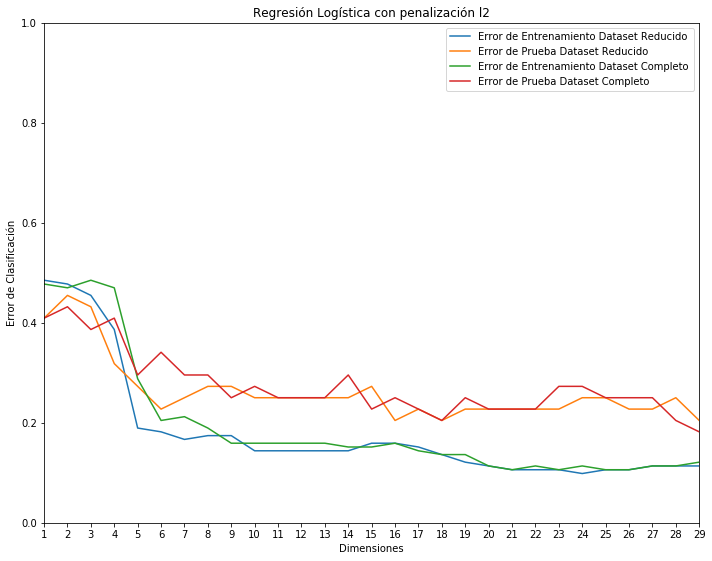

In [53]:
plot_m(30,1,20,'linear',2)

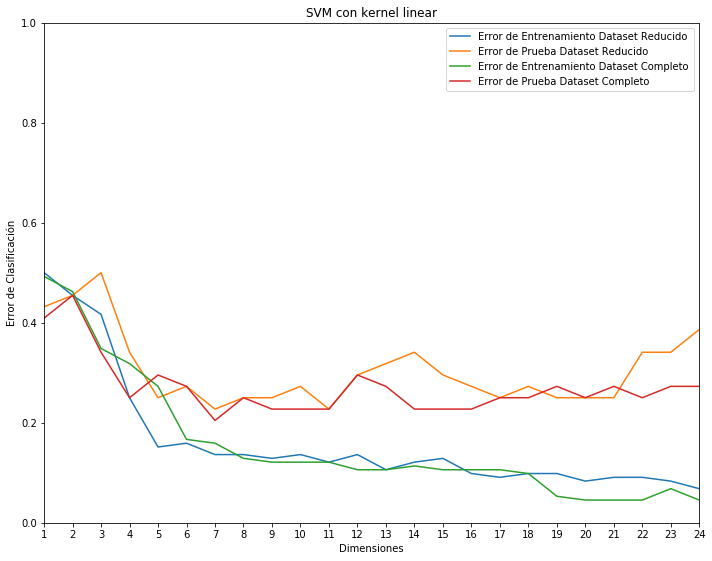

In [54]:
plot_m(25,2,20,'linear',2)

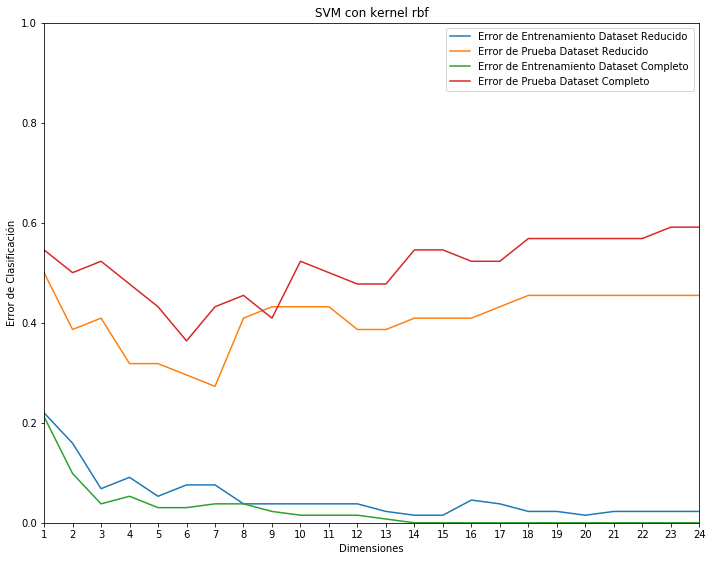

In [55]:
plot_m(25,2,20,'rbf',2)

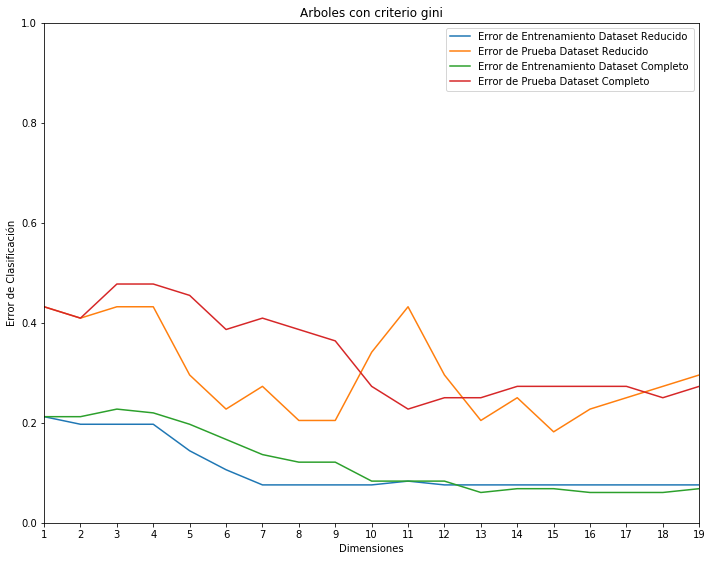

In [56]:
plot_m(20,3,20,'gini',5)

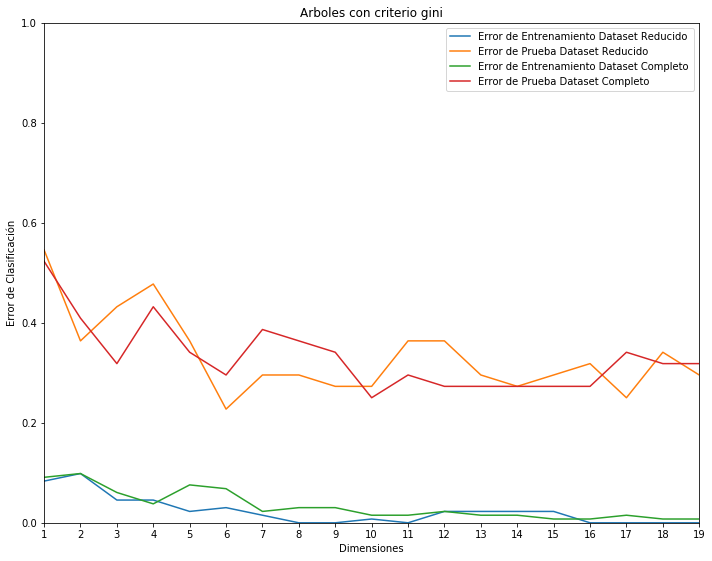

In [57]:
plot_m(20,3,20,'gini',8)

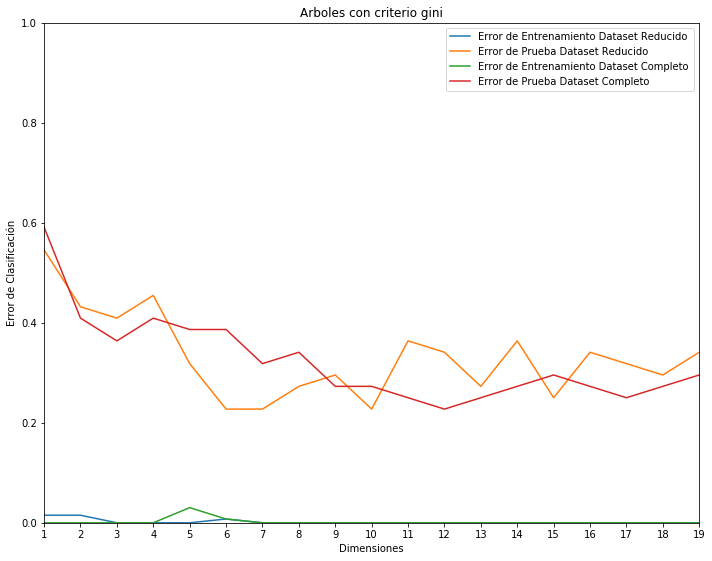

In [58]:
plot_m(20,3,20,'gini',11)

#### Respuesta
En temas de dimensionalidad, todos los algoritmos tanto con el dataset completo o el reducido experimentan una disminución del error de clasificación tanto de entrenamiento como de prueba. Este se comporta distinto dependiendo de que modelo se ocupo:

1. Para Regresión Logística con penalización l2, los errores de entrenamiento y de prueba disminuyeron considerablemente, sin quedar sumamente ajustados al modelo (ya que igual existe un gran margen de error), por lo cual confirma que este paso es un buen feature para la regresión logística, incluso es tan bueno, que en algunos puntos el error del dataset reducido genera una mejor generalización y un menor error al momento de entrenar y testear la máquina.

2. Para SVM, al ir aumentando la dimensionalidad, tanto con kernel lineal como rbf existe un punto en el cual el error de prueba se dispara, esto quiere decir que la decisión poco natural (ya que lo natural es mantener la dimensionalidad al mínimo por la maldición de la dimensionalidad) es un buena práctica para este caso, pero solamente hasta cierto punto, por que pasado ese punto los errores se disparan y la máquina ya no se vuelve buena al momento de usar los datos de prueba.

3. para los arboles de clasificación, la profundidad del árbol tiene una directa implicancia con la dimensionalidad, esto se debe por que el primer corte que divide el dataset es respectivo a la dimensión mas importante, por lo cual a medida que quitamos dimensiones y realizamos la división, el error de entrenamiento se reduce extremadamente rápido, ajustando demasiado nuestro modelo a medida que quitamos dimensiones. Por otro lado si tenemos una profundidad pequeña (5 en nuestro caso) se logra tener un errores relativamente aceptables para considerable que la máquina no esta sobre ajustada y se puede apreciar que la curva de error con el dataset mas pequeño es mas representativo que el dataset completo, por lo cual generaliza mejor la máquina. 

#### (n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos en d = 2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


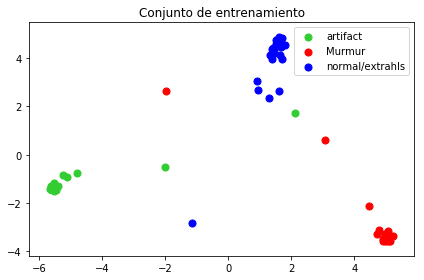

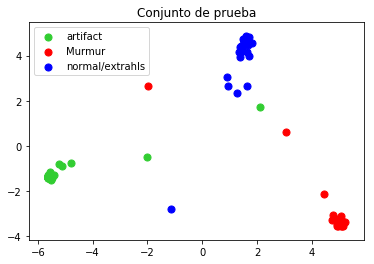

In [59]:
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.title('Conjunto de entrenamiento')
plt.tight_layout()
plt.show()

for i in range(len(X_pca_train)):
    if y_train[i] == 0:
        p1 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "limegreen")
    elif y_train[i] == 1:
        p2 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "red")
    elif y_train[i] == 2:
        p3 = plt.scatter(X_pca_train[i,0], X_pca_train[i,1], s=50, c = "blue")
plt.legend([p1, p2, p3], ["artifact", "Murmur", "normal/extrahls"])
plt.title('Conjunto de prueba')
plt.show()

#### Observación

Ya que LDA incluye un cálculo de de la matriz inverso de varianza la cual la hace imprecisa cuando el determinante es aproximadamente 0 (lo que indica que 2 o mas variables estan sumamente relacionadasa), por lo cual se genera un warning.

Destacar que en clases se habló del número de condición, el cual es del orden de 10^16 el cual es muy grande.

#### (o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) con el i) en el nuevo espacio generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.

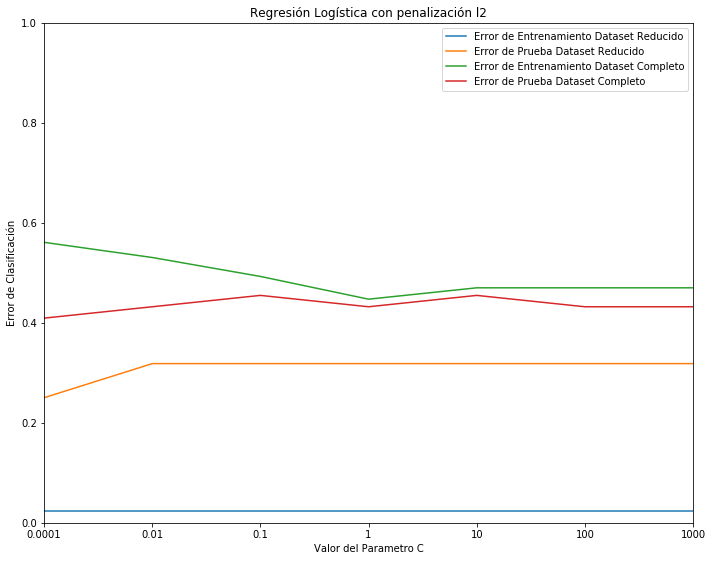

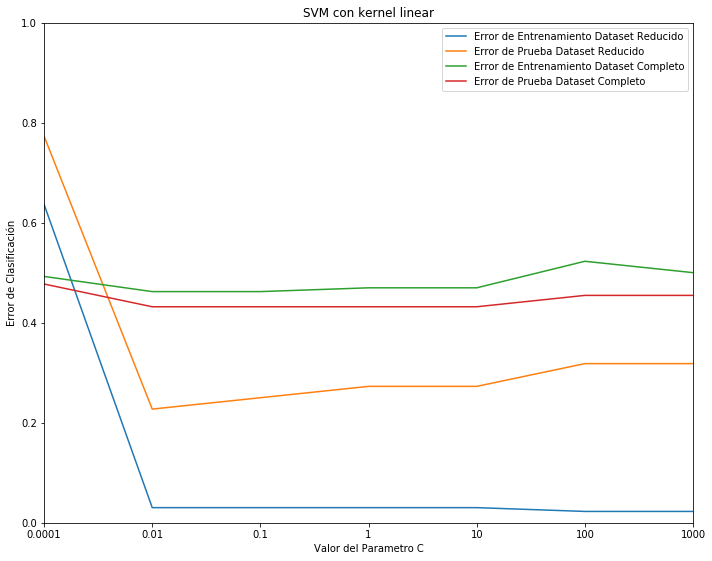

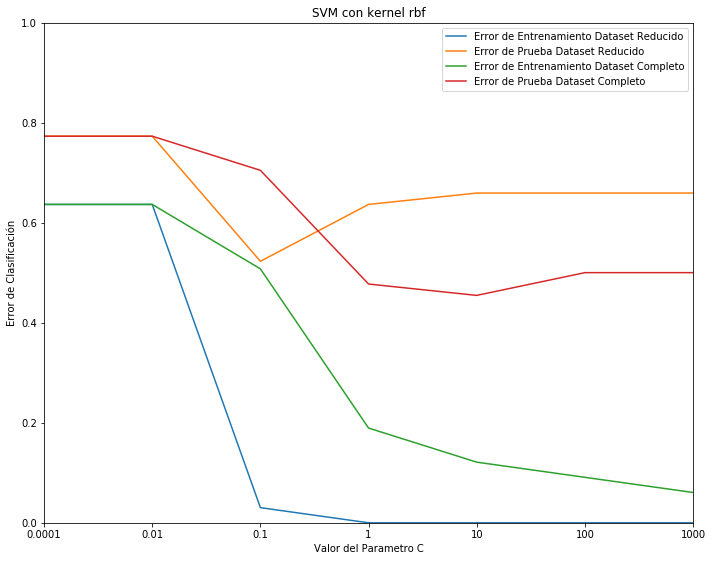

In [60]:
def ploteo_k(Cs, modelo,X_pca_train,X_pca_test,y_train,y_test,kernel): 
    error_train = []
    error_test = []
    error_trainFULL = []
    error_testFULL = []
    
    
    pasos = [1,2,3,4,5,6,7]
    Cs = [0.0001,0.01,0.1,1,10,100,1000]
    for i,param in enumerate((0.0001,0.01,0.1,1,10,100,1000)):
        if(modelo == 1):
            model=LR()
            model.set_params(C=param,penalty='l2')
            model.fit(X_pca_train,y_train)
            
            modelFULL=LR()
            modelFULL.set_params(C=param,penalty='l2')
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        if(modelo ==2):
            model = SVM()
            model.set_params(C=param,kernel=kernel)
            model.fit(X_pca_train,y_train)
            
            modelFULL = SVM()
            modelFULL.set_params(C=param,kernel=kernel)
            modelFULL.fit(X_pca_trainFULL,y_trainFULL)
            
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))

    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(pasos, error_test, label='Error de Prueba Dataset Reducido')
    
    plot.plot(pasos, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(pasos, error_testFULL, label='Error de Prueba Dataset Completo')
    plt.legend()
    if(modelo == 1):
        plt.title('Regresión Logística con penalización l2')
        plt.ylim(0, -0.4)
    if(modelo == 2):
        plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()
        
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],1,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'linear')
ploteo_k([0.0001,0.01,0.1,1,10,100,1000],2,X_pca_train,X_pca_test,y_train,y_test,'rbf')

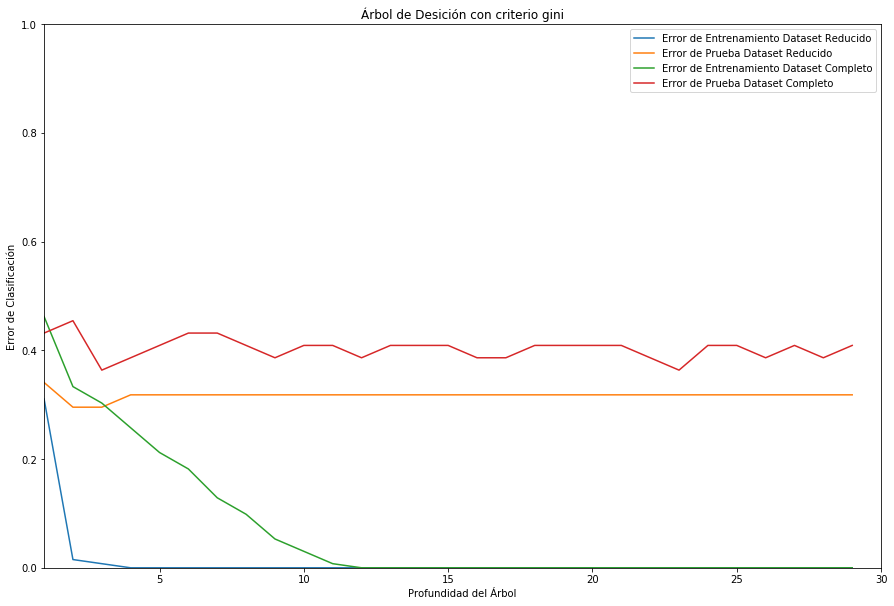

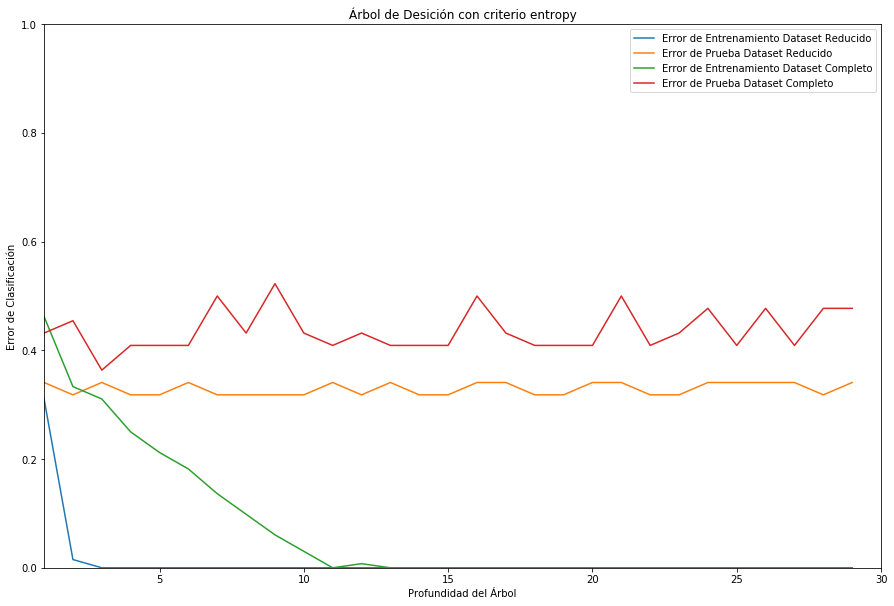

In [61]:
def plot_i(minimo, maximo,criterio):
    profundidad = range(minimo,maximo)
    error_train= []
    error_test = []
    error_trainFULL= []
    error_testFULL = []
    
    for c in profundidad:
        model= Tree()
        model.set_params(max_depth=c,criterion=criterio,splitter='best')
        model.fit(X_pca_train,y_train)
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))
        
        modelFULL= Tree()
        modelFULL.set_params(max_depth=c,criterion=criterio,splitter='best')
        modelFULL.fit(X_pca_trainFULL,y_trainFULL)
        yhat_trainFULL = modelFULL.predict(X_pca_trainFULL)
        yhat_testFULL = modelFULL.predict(X_pca_testFULL)
        error_trainFULL.append(1-accuracy_score(y_trainFULL, yhat_trainFULL))
        error_testFULL.append(1-accuracy_score(y_testFULL, yhat_testFULL))
        
        
        
    plt.figure(figsize=(15,10))
    plot = plt.subplot(1,1,1)
    plot.plot(profundidad, error_train, label='Error de Entrenamiento Dataset Reducido')
    plot.plot(profundidad, error_test, label='Error de Prueba Dataset Reducido')
    plot.plot(profundidad, error_trainFULL, label='Error de Entrenamiento Dataset Completo')
    plot.plot(profundidad, error_testFULL, label='Error de Prueba Dataset Completo')
    
    plt.legend()
    plt.xlabel('Profundidad del Árbol')
    plt.ylabel('Error de Clasificación')
    plt.title('Árbol de Desición con criterio ' + criterio)
    plt.axis([minimo,maximo,0.0, 1])

    plt.show()
plot_i(1,30,'gini')
plot_i(1,30,'entropy')

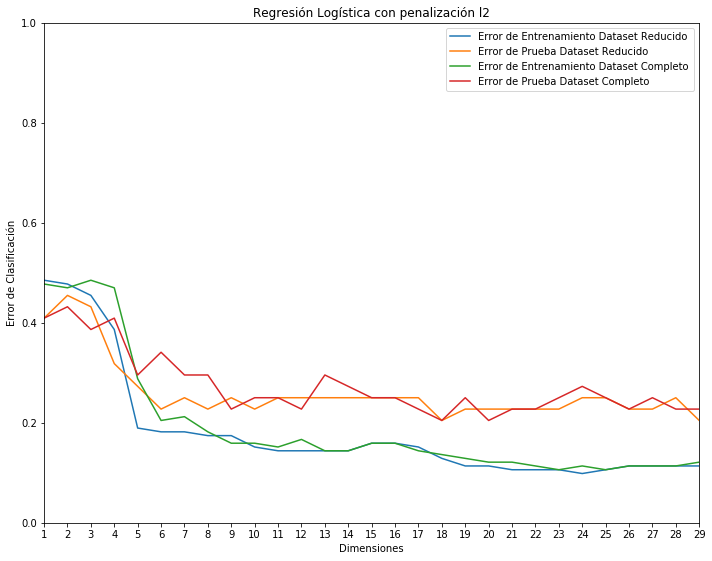

In [62]:
plot_m(30,1,20,'linear',2)

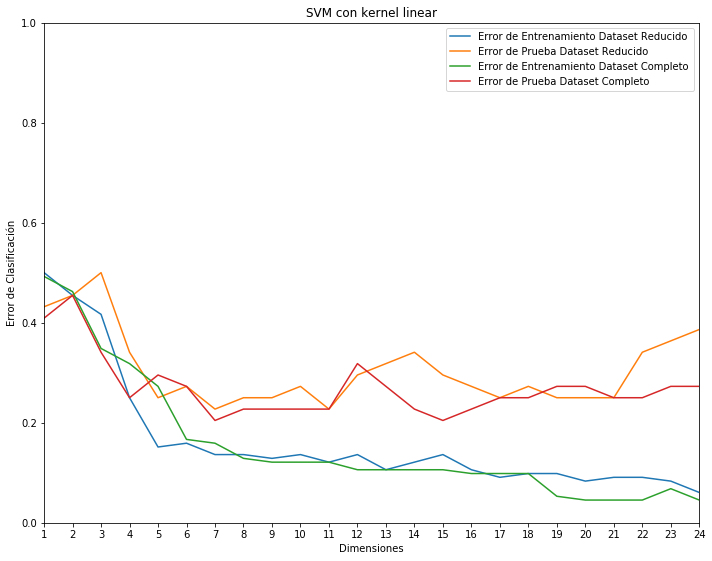

In [63]:
plot_m(25,2,20,'linear',2)

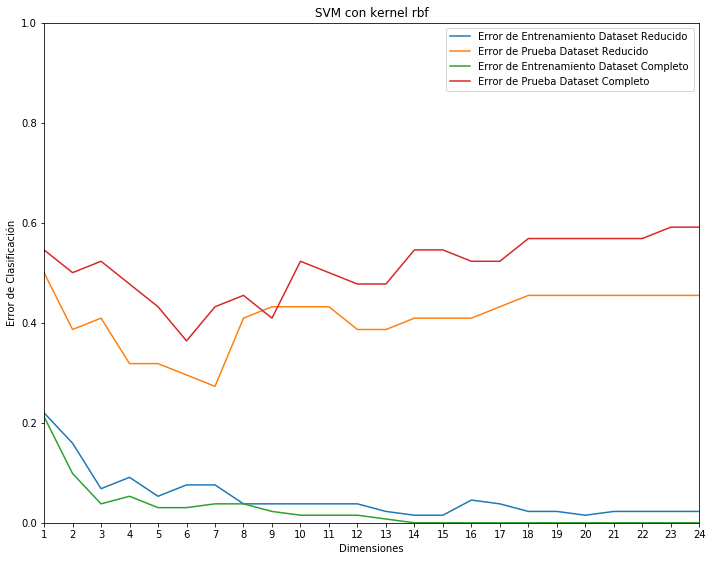

In [64]:
plot_m(25,2,20,'rbf',2)

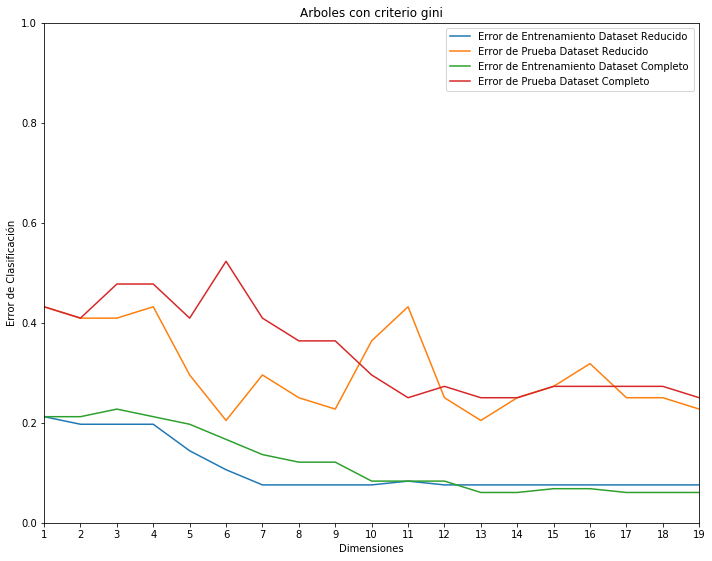

In [65]:
plot_m(20,3,20,'gini',5)

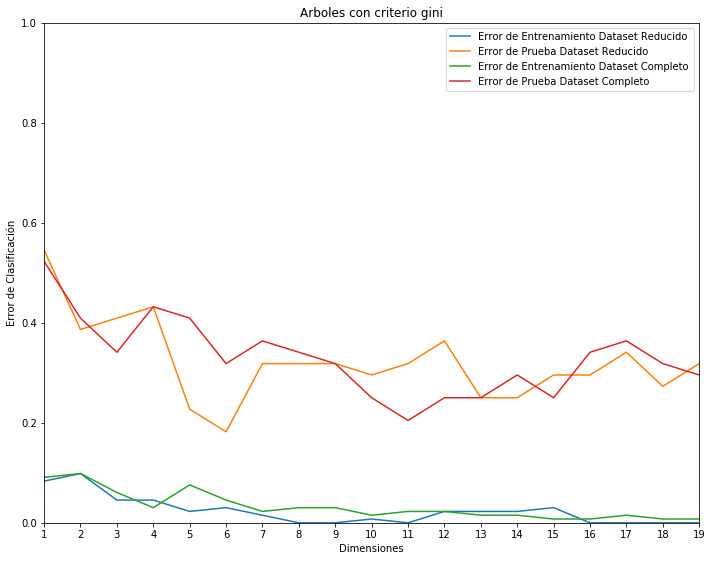

In [66]:
plot_m(20,3,20,'gini',8)

#### Respuesta

Para los siguientes modelos:

1. Para la Regresión Logística: Con la nueva reducción LDA los errores de entrenamiento disminuyeron bastantes, generando grandes brechas entre error de entrenamiento y de prueba, generalizando mejor la máquina.
2. Para SVM: SVM tanto lineal como brf desde cierto punto de regularización o de dimensionalidad el error aumenta mucho, la diferencia es que con LDA el salto de los errores con cada variación de la dimensionalidad o del parámetro regularizador es mas marcada y abrupta.
3. Árboles de Clasificación: Este modelo si fue afectado por LDA, ya que marco brechas mas grandes entre el error del dataset completo al reducido, logrando que el dataset reducido sea representativo o no en ciertos casos. Además, el error de entrenamiento disminuye mas lentamente mientras aumentamos la dimensionalidad pero en el caso del parámetro regularizador dismuye mas rápidamente.

#### (p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterísticas (feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6] [7] si desea.

In [67]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from __future__ import print_function
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pylab 
import scipy.stats as stats
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from sklearn import preprocessing
from scipy.stats import iqr
from sklearn.preprocessing import RobustScaler

def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux


def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b


In [68]:
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
df.drop(['dataset','sublabel'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
estadisticos = np.zeros((X.shape[0],3))

for i in range(0,X.shape[0]):
    estadisticos[i][0] = min(X[i])
    estadisticos[i][1] = max(X[i])
    estadisticos[i][2] = np.var(X[i])

    
estadisticos.shape

(176, 3)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(estadisticos, y, test_size=0.25, random_state=43)
std = StandardScaler(with_mean=True, with_std=True)
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [70]:
model=LR() #define your model
model.set_params(C=20,penalty='l2')
model.fit(X_train,y_train)
yhat_SVM_train = model.predict(X_train)
yhat_SVM_test = model.predict(X_test)

print("Miss Classification Error Train LR: %f"%(1-accuracy_score(y_train, yhat_SVM_train)))
print("Miss Classification Error Test LR: %f"%(1-accuracy_score(y_test, yhat_SVM_test)))

Miss Classification Error Train LR: 0.469697
Miss Classification Error Test LR: 0.363636


In [71]:
model= SVM()
model.set_params(C=20,kernel='linear')
model.fit(X_train,y_train)
yhat_SVM_train = model.predict(X_train)
yhat_SVM_test = model.predict(X_test)

print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_train, yhat_SVM_train)))
print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_test, yhat_SVM_test)))

Miss Classification Error Train SVM: 0.431818
Miss Classification Error Test SVM: 0.340909


In [72]:
model= SVM()
model.set_params(C=20,kernel='rbf')
model.fit(X_train,y_train)
yhat_SVM_train = model.predict(X_train)
yhat_SVM_test = model.predict(X_test)

print("Miss Classification Error Train SVM: %f"%(1-accuracy_score(y_train, yhat_SVM_train)))
print("Miss Classification Error Test SVM: %f"%(1-accuracy_score(y_test, yhat_SVM_test)))

Miss Classification Error Train SVM: 0.303030
Miss Classification Error Test SVM: 0.295455


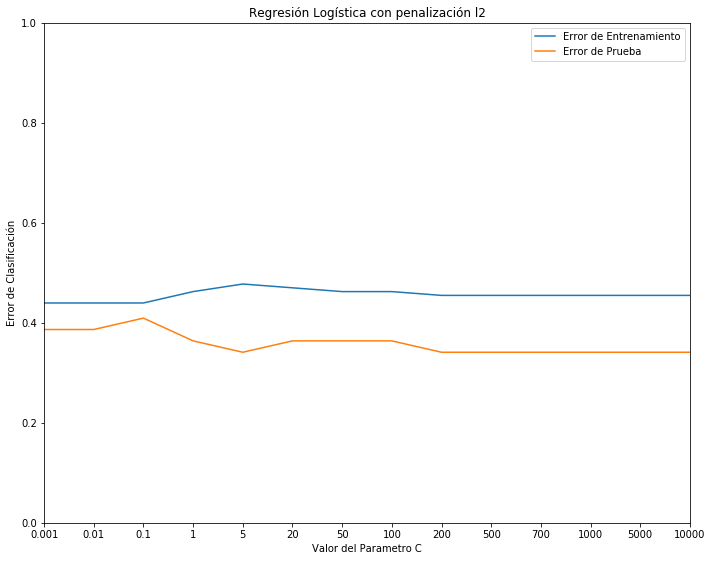

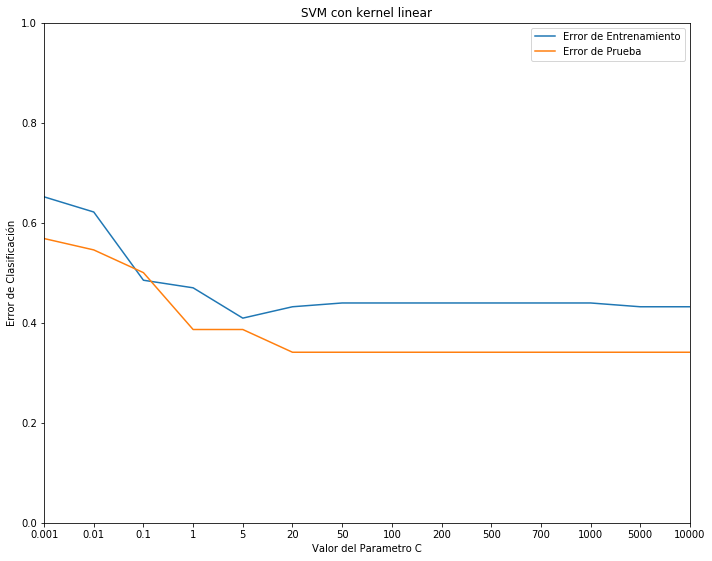

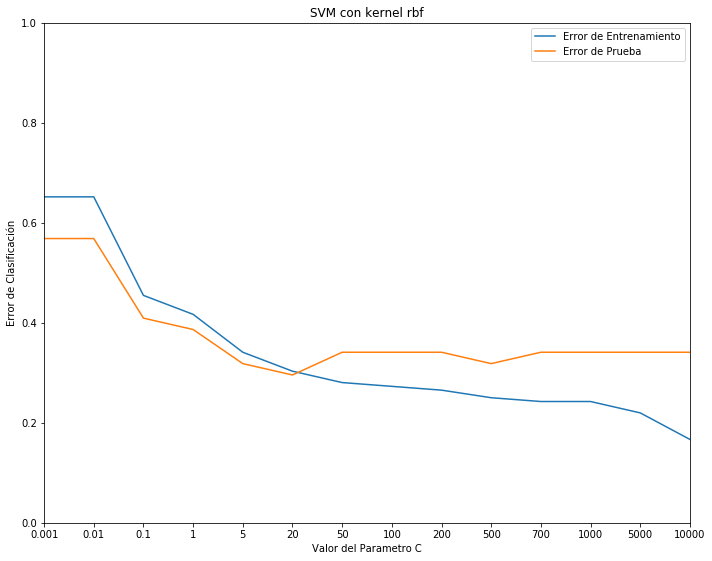

In [73]:
def ploteo_k(Cs, modelo,X_pca_train,X_pca_test,y_train,y_test,kernel): 
    error_train = []
    error_test = []
    
    
    pasos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    Cs = [0.001,0.01,0.1,1,5,20,50,100,200,500,700,1000,5000,10000]
    for i,param in enumerate((0.001,0.01,0.1,1,5,20,50,100,200,500,700,1000,5000,10000)):
        if(modelo == 1):
            model=LR()
            model.set_params(C=param,penalty='l2')
            model.fit(X_pca_train,y_train)

            
        if(modelo ==2):
            model = SVM()
            model.set_params(C=param,kernel=kernel)
            model.fit(X_pca_train,y_train)
            

            
        yhat_train = model.predict(X_pca_train)
        yhat_test = model.predict(X_pca_test)
        

        
        error_train.append(1-accuracy_score(y_train, yhat_train))
        error_test.append(1-accuracy_score(y_test, yhat_test))


    plt.figure(figsize=(10,15))
    plot = plt.subplot(2,1,1)
    plot.plot(pasos, error_train, label='Error de Entrenamiento')
    plot.plot(pasos, error_test, label='Error de Prueba')

    plt.legend()
    if(modelo == 1):
        plt.title('Regresión Logística con penalización l2')
        plt.ylim(0, -0.4)
    if(modelo == 2):
        plt.title('SVM con kernel '+kernel)
    plt.xlabel('Valor del Parametro C')
    plt.ylabel('Error de Clasificación')
    plt.axis([1,2,0, 1])
    plt.xticks(pasos, Cs)
    plt.tight_layout()
    plt.show()
        
ploteo_k([0.001,0.01,0.1,1,5,20,50,100,200,500,700,1000,5000,10000],1,X_train,X_test,y_train,y_test,'linear')
ploteo_k([0.001,0.01,0.1,1,5,20,50,100,200,500,700,1000,5000,10000],2,X_train,X_test,y_train,y_test,'linear')
ploteo_k([0.001,0.01,0.1,1,5,20,50,100,200,500,700,1000,5000,10000],2,X_train,X_test,y_train,y_test,'rbf')

#### Respuesta

Como podemos notar, con solo los estadísticos del máximo, el mínimo y la varianza, podemos obtener un mínimo error de clasificación siendo el mas bajo de estos 30% con SVM kernel rbf el cual mejora considerablemente todas las máquinas anteriormente echas. Esto significa que si con solamente 3 estadísticos básicos se logra mejorar tanto el resultado. 

Si agregamos mas estadísticos por ejemplo rango interquantil, centroides, media, moda, etc se podrá llegar a un error muy pequeño por lo cual tendremos una excelente máquina (la discusión en clases afirmo que usando aproximadamente 13 estadísticos se logro reducir el error a un 15% aproximadamente). Por otro lado en el tema del regularizador, su mejor desempeño se logra cuando el valor del parámetro es 20.

### 3. Análisis de emociones en tweets

#### IMPORTANTE: Para facilitar la lectura, a partir de aquí los resultados y observaciones estarán justo después del enunciado, y luego la ejecución del código.

In [6]:
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import preprocessor as p
import string
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC as SVM
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

[nltk_data] Downloading package wordnet to /Users/nano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### (a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el dataset.

#### Respuesta

* 4000 tweets con 4 atributos
    * "tweet_id" representa el id (asignado por tweeter) que se le da a cierto comentario/publicación creado por cierto autor
    * "sentiment" es el sentimiento (etiqueta o label) que se le asigno previamente a cierto comentario/publicación, el cual puede ser neutral, worry, happiness, sadness, love, surpirse, fun, relief, hate, empty, enthusiasm, boredom o anger
    * "author" es el author del comentario/publicación
    * "content" es el comentario/publicación de cierto autor

Las etiquetas posibles son las correspondientes al atributo "sentiment". La cantidad y sus nombres se describen a continuación:

    neutral       8638
    worry         8459
    happiness     5209
    sadness       5165
    love          3842
    surprise      2187
    fun           1776
    relief        1526
    hate          1323
    empty          827
    enthusiasm     759
    boredom        179
    anger          110

#### Código

In [7]:
df = pd.read_csv('./text_emotion.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [8]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [9]:
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

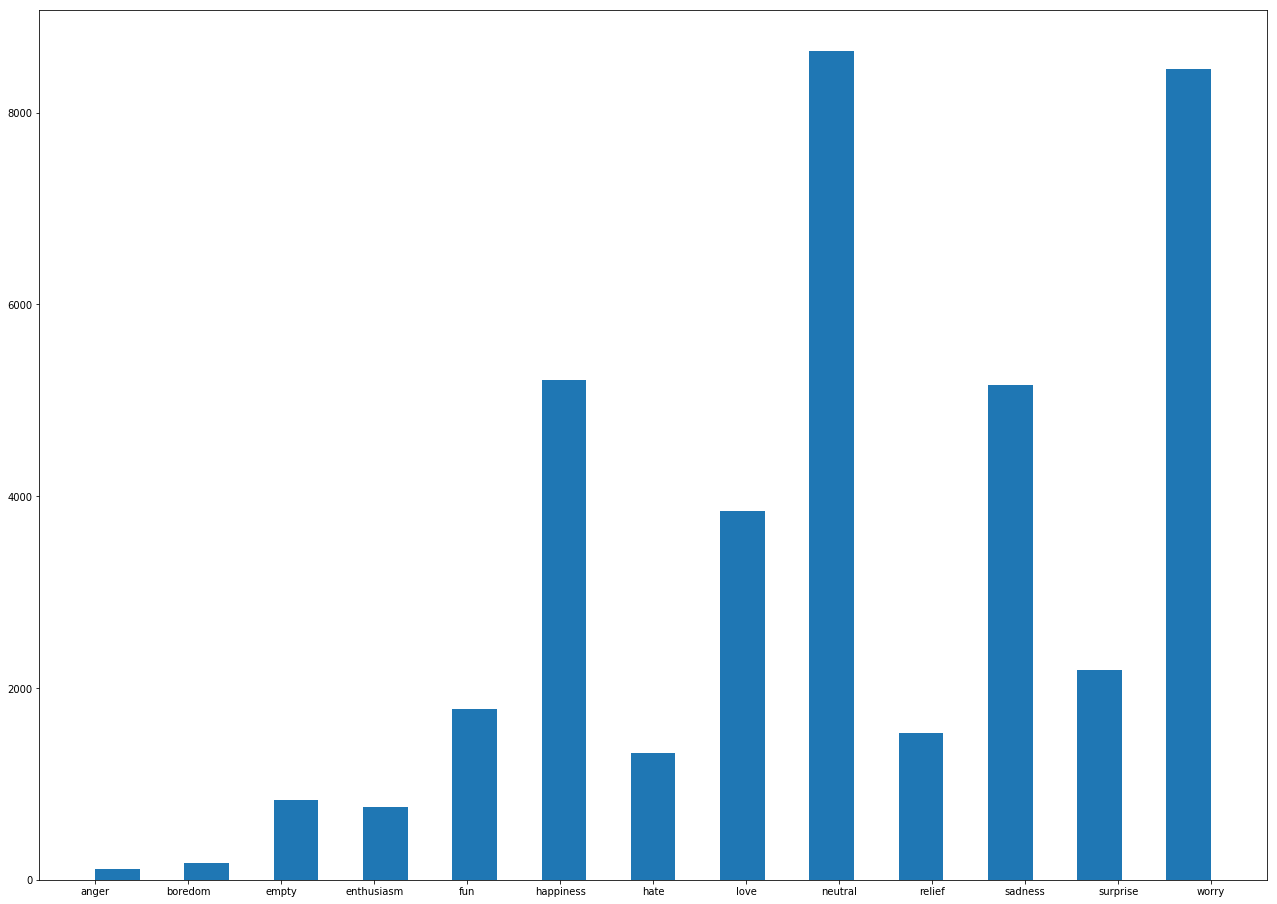

In [10]:
df['sentiment'].hist(bins=25, figsize=(22,16), grid=False)
plt.show()

#### (b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos.

#### Obsrvación

Esta división se puede justificar mediante el "Principio de Pareto", que afirma que el 20% de un suceso es justificado por el 80% restante, sin embargo al ser una cantidad tan abundante de datos, podría haberse usado de igual forma una proporción 90/10, sin afectar el proceso de entrenamiento ni el de pruebas.

#### Código

In [11]:
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31944 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     31944 non-null int64
sentiment    31944 non-null object
author       31944 non-null object
content      31944 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8056 entries, 5 to 39996
Data columns (total 4 columns):
tweet_id     8056 non-null int64
sentiment    8056 non-null object
author       8056 non-null object
content      8056 non-null object
dtypes: int64(1), object(3)
memory usage: 314.7+ KB


#### (c) Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado en el cual se podrán trabajar.

#### Observación

Se eliminan URL, menciones, hashtags, palabras reservadas(RT y FAV), números, puntuación, se lematizó y se puso en minúsculas. <b>Se mantienen emojis y emoticones</b>, debido a que pueden entregar información de emociones de forma mas certera.

#### Código

In [12]:
def preprocess(df):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tweets = df['content']
    translator = str.maketrans('', '', string.punctuation)
    if ('tweet_id' or "author") in df:
        df.drop(['tweet_id','author'],axis=1,inplace=True) #Eliminacion de Datos Inecesarios que no aportar informacion relevante
    for ti in range(df.shape[0]):
        p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.RESERVED, p.OPT.NUMBER)
        tweets[ti] = tweets[ti].translate(translator)
        tweets[ti] = p.clean(tweets[ti])
        tweets[ti] = tweets[ti].lower()
        tweets[ti] = [i for i in tweets[ti].lower().split() if i not in stop_words]
        for wi in range(len(tweets[ti])):
            tweets[ti][wi] = lemmatizer.lemmatize(tweets[ti][wi])
        tweets[ti] = " ".join(tweets[ti])
    return tweets
df['content'] = preprocess(df)


#### (d) Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases. Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los datos puede afectar considerablemente al modelo.

#### Comentario

Se observa que la diferencia de cantidad entre una clase y otra es de 764, lo cual es suficiente para clasificar correctamente sin problemas de baja representación por diferencia de cantidad de ejemplos.

    neutral       0
    worry         -1
    happiness     +1
    sadness       -1
    love          +1
    surprise      +1
    fun           +1
    relief        +1
    hate          -1
    empty         -1
    enthusiasm    +1
    boredom       -1
    anger         -1

#### Código

In [13]:
mapping = {"happiness": 1,"love": 1,"surprise": 1,"fun": 1,"relief": 1,"enthusiasm": 1,'worry':-1,'sadness':-1,'hate':-1,'empty':-1,'boredom':-1,'anger':-1,'neutral':0}
df_binary = df.replace({'sentiment': mapping})
df_binary = df_binary[df_binary.sentiment != 0]
df_binary['sentiment'].value_counts()

-1    16063
 1    15299
Name: sentiment, dtype: int64

#### (e) Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será necesario representar los tweets {ti}_n_i=1 disponibles como vectores de características (features). El tipo de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de todas las palabras que se observen en los tweets. Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text [12] (CountVectorizer y TfidfVectorizer ). Recuerde realizar el ajuste (fit) únicamente con el conjunto de entrenamiento, para luego transformar el conjunto de pruebas (con el método transform).

#### Comentario

El código anterior genera una matriz que contiene en las columnas booleanos que dicen si un tweet tiene o no la palabra. Este el método estandar de representación de texto plano.

Se puede ver que se hizo uso de PCA para reducir la alta dimensionalidad del problema asociado a la cantidad de palabras posibles que pueden surgir en miles de tweets. Por temas de tiempo de ejecución, este valor se fijó en 5.

#### Código

In [14]:
X = df_binary['content'].values
y = df_binary['sentiment'].values
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X, y,test_size=0.20, random_state=42)

frecuencia_terminos = TfidfVectorizer(lowercase=True)
X_train_binary_vec = frecuencia_terminos.fit_transform(X_train_binary).toarray()
X_test_binary_vec = frecuencia_terminos.transform(X_test_binary).toarray()

pca_model = PCA(n_components=5)
pca_model.fit(X_train_binary_vec)
X_train_binary_vec_pca = pca_model.transform(X_train_binary_vec)
X_test_binary_vec_pca = pca_model.transform(X_test_binary_vec)

#### (f) Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.

#### Resultado

Llama la atención que los redimientos de todas las máquinas, tanto para datos de test como para de entrenamiento, son muy parecidos, con accuracy de al rededor de 0.55, exceptuando el árbol, que en su conjunto de entrenamiento logró un noble resultado, pero que sin embargo en el conjinto de pruebas logró el mismo resultado que todos los demás.

#### Código

In [15]:
def compare_models(models, Xtrain, Xtest,ytrain, ytest):
    scores = {}
    for label, model in models.items():
        model.fit(Xtrain, ytrain)
        scores[label + " Train"] = accuracy_score(ytrain, model.predict(Xtrain))
        scores[label + " Test"] = accuracy_score(ytest,  model.predict(Xtest))
    for label, score in scores.items():
        print("Score " + label + ": %f"%(score))
    plt.figure();
    dfplot=pd.DataFrame(columns=["Models","Miss Classification Loss"])
    dfplot["Models"]=list(scores.keys())
    dfplot["Classification Score"]=list(scores.values())
    dfplot.sort_values(by='Classification Score',inplace=True)
    dfplot.plot(kind='bar',x='Models',y='Classification Score',title="Classification Score",figsize=(10,5))
    plt.show()
    return scores

Score B|R. Logística Train: 0.601339
Score B|R. Logística Test: 0.585206
Score B|QDA Train: 0.563912
Score B|QDA Test: 0.564802
Score B|LDA Train: 0.595640
Score B|LDA Test: 0.581859
Score B|DTree|Gini Train: 0.993503
Score B|DTree|Gini Test: 0.573729
Score B|SVM|Lineal Train: 0.588146
Score B|SVM|Lineal Test: 0.573250


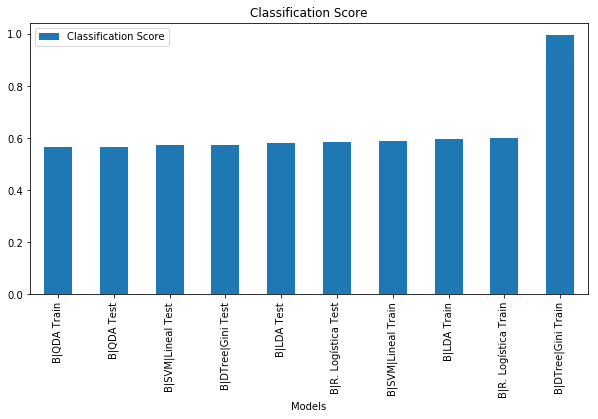

In [16]:
models_f = {"B|R. Logística":LR(), "B|QDA" : QDA(), "B|LDA":LDA(), "B|DTree|Gini" : Tree(criterion='gini',splitter='best'), "B|SVM|Lineal" : SVM(kernel='linear')}
scores_f = compare_models(models_f, X_train_binary_vec_pca, X_test_binary_vec_pca, y_train_binary, y_test_binary)

#### (g) Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?

#### Respuesta

    1. Precision es el porcentaje de elementos designados a una clase que efectivamente pertenecen a ella. 
    2. Recall es el porcentaje de elementos de una clase que fueron desigandos correctamente en ella. 
    3. f1-score es el promedio armónico entre ambos valores y es mejor mientras mas cercano sea a 1. Significa que la máquina es capaz de redicir muchisimo los falsos positivos y que a la vez fue capaz de clasificar una gran cantidad de los elementos que pertenecen a esa clase.
    4. Support es la cantidad de elemntos en la clase.

En base al índice f1-score, los mejores modelos en rendimiento han sido la regresión logística y LDA, con un 0.58 y um 0.57 en este índice

#### Código

In [17]:
def score_the_model(model,x,y,xt,yt,target):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print("Training Accuracy: %f"%(acc_tr))
    print("Test Accuracy: %f"%(acc_test))
    print("Detailed Analysis Testing Results ...")
    print(classification_report(yt, model.predict(xt), target_names=target))

In [18]:
for label ,model in models_f.items():
    score_the_model(model, X_train_binary_vec_pca, y_train_binary, X_test_binary_vec_pca, y_test_binary, ['+','-'])

Training Accuracy: 0.601339
Test Accuracy: 0.585140
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.60      0.59      0.60      3251
          -       0.57      0.58      0.57      3022

avg / total       0.59      0.59      0.59      6273

Training Accuracy: 0.563912
Test Accuracy: 0.564732
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.55      0.91      0.68      3251
          -       0.66      0.20      0.30      3022

avg / total       0.60      0.56      0.50      6273

Training Accuracy: 0.595640
Test Accuracy: 0.581792
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.60      0.57      0.59      3251
          -       0.56      0.59      0.58      3022

avg / total       0.58      0.58      0.58      6273

Training Accuracy: 0.993503
Test Accuracy: 0.573661
Detailed Analysis Testing Results

#### (i) Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones), es decir, su trabajo será el de predecir una de las distintas emociones de cada tweet. Para esto utilice el mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.

#### Observación

Nos vimos obligados a reducir el conjunto original debido a que PCA no lograba terminar su ejecución con el conjunto completo.

Se realizó el mismo procedimiento de las preguntas c, d y e, diferenciando el mapeo utilizado, el cual funamente fue es que se describe a continuación:

    neutral: 0
    happiness:  1
    love:  2
    surprise:  3
    fun:  4 
    enthusiasm:  5
    worry: -1
    sadness: -2
    relief: -3
    hate: -4
    empty: -5
    boredom: -6
    anger: -7
    
#### Código

In [19]:
df_i = pd.read_csv('./text_emotion.csv')
df_i = df_i.sample(frac=0.3, replace=True).reset_index(drop=True)
df_i['content'] = preprocess(df_i)
mappingMc = {"neutral": 0, "happiness":  1, "love":  2, "surprise":  3, "fun":  4 , "relief": 5, "enthusiasm":  6, "worry": -1, "sadness": -2, "hate": -3, "empty": -4, "boredom": -5, "anger": -6}
df_mc = df_i.replace({'sentiment': mappingMc})
Xmc = df_mc['content'].values
ymc = df_mc['sentiment'].values
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(Xmc, ymc,test_size=0.20, random_state=42)
frecuencia_terminosMC = TfidfVectorizer(lowercase=True)
X_train_mc_vec = frecuencia_terminosMC.fit_transform(X_train_mc).toarray()
X_test_mc_vec = frecuencia_terminosMC.transform(X_test_mc).toarray()
pca_model = PCA(n_components=5)
pca_model.fit(X_train_mc_vec)
X_train_mc_vec_pca = pca_model.transform(X_train_mc_vec)
X_test_mc_vec_pca = pca_model.transform(X_test_mc_vec)

#### (j) Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en cada tweet, muestre sus desempeños a través del error de pruebas en un gráfico resumen.

#### Observación

Se puede ver que el mejor rendimiento es obtenido por el árbol de clasificación. Luego de el todos los clasificadores obtienen valores bastante homogéneos y bastante malos con f1-score de entre 0.17 y 0.24, diciendo que sin umportar el conjunto, los puntos se estan calificando mal y pocos.

#### Código

Score DTree|Gini Train: 0.986458
Score DTree|Gini Test: 0.355417
Score R. Logística Train: 0.252083
Score R. Logística Test: 0.237917
Score KNeighbors Train: 0.481563
Score KNeighbors Test: 0.248750
Score Bernoulli Train: 0.253958
Score Bernoulli Test: 0.247500
Score LDA Train: 0.252604
Score LDA Test: 0.240833


/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


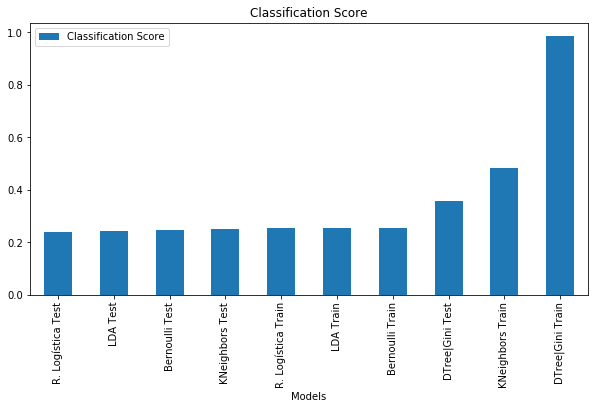

Training Accuracy: 0.986458
Test Accuracy: 0.355565
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.20      0.22      0.21         9
          1       0.43      0.23      0.30        13
          2       0.28      0.15      0.20        59
          3       0.20      0.17      0.18        83
          4       0.38      0.40      0.39       341
          5       0.40      0.41      0.41       513
          6       0.39      0.42      0.41       492
         -1       0.34      0.35      0.35       321
         -2       0.37      0.33      0.35       212
         -3       0.24      0.21      0.22       138
         -4       0.19      0.23      0.21        90
         -5       0.25      0.28      0.26        83
         -6       0.37      0.30      0.33        46

avg / total       0.35      0.36      0.35      2400

Training Accuracy: 0.252083
Test Accuracy: 0.238016
Detailed Analysis Testing Results ...
             precision

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training Accuracy: 0.481563
Test Accuracy: 0.248854
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00        13
          2       0.08      0.07      0.07        59
          3       0.10      0.10      0.10        83
          4       0.22      0.29      0.25       341
          5       0.30      0.35      0.32       513
          6       0.28      0.34      0.31       492
         -1       0.25      0.21      0.23       321
         -2       0.34      0.25      0.29       212
         -3       0.13      0.06      0.08       138
         -4       0.05      0.02      0.03        90
         -5       0.09      0.04      0.05        83
         -6       0.16      0.07      0.09        46

avg / total       0.24      0.25      0.24      2400

Training Accuracy: 0.253958
Test Accuracy: 0.247603
Detailed Analysis Testing Results ...
             precision

In [20]:
models_mc = {"DTree|Gini":Tree(criterion='gini',splitter='best'), "R. Logística":LR(), "KNeighbors":KNeighborsClassifier(), "Bernoulli":BernoulliNB(), "LDA":LDA()}
scores_mc = compare_models(models_mc, X_train_mc_vec_pca, X_test_mc_vec_pca, y_train_mc, y_test_mc)
for label ,model in models_mc.items():
    score_the_model(model, X_train_mc_vec_pca, y_train_mc, X_test_mc_vec_pca, y_test_mc, ["0","1", "2", "3", "4" , "5", "6", "-1", "-2", "-3", "-4", "-5", "-6"])

#### (k) Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs One y One vs All/Rest [14]

#### Observación

Se usaron los mismos clasificadores de la pregunta anterior con la modificación de los métodos One vs One y One vs All/Rest.

No se observaron grandes cambios respecto a los calificadores sin extensión. Los índices de accuracy y f1-score se mantuvieron iguales que en la pregunta anterior.

Estos métodos lo que hacen es asignarle un puntaje comparando una clase, por ejemplo 0, con todo el resto del conjunto tomado como "no cero". Dado esto uno tendería a pensar que la comparación binaria haría mejorar la accuracy, sin embargo no fue así, quizas por lo homogéneo del rendimiento de la mayoría de los métodos.

#### Código

Score OR|DTree|Gini Train: 0.986458
Score OR|DTree|Gini Test: 0.305000
Score OR|R. Logística Train: 0.252083
Score OR|R. Logística Test: 0.237917
Score OR|KNeighbors Train: 0.483229
Score OR|KNeighbors Test: 0.240417
Score OR|Bernoulli Train: 0.253958
Score OR|Bernoulli Test: 0.247500
Score OR|LDA Train: 0.252083
Score OR|LDA Test: 0.239583


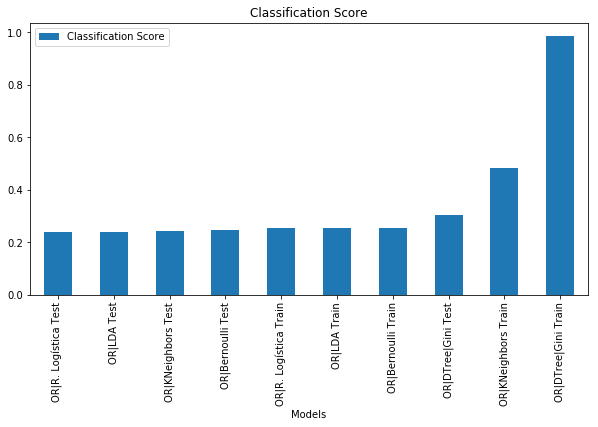

Training Accuracy: 0.986458
Test Accuracy: 0.355565
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.20      0.22      0.21         9
          1       0.43      0.23      0.30        13
          2       0.28      0.15      0.20        59
          3       0.20      0.17      0.18        83
          4       0.38      0.40      0.39       341
          5       0.40      0.41      0.41       513
          6       0.39      0.42      0.41       492
         -1       0.34      0.35      0.35       321
         -2       0.37      0.33      0.35       212
         -3       0.24      0.21      0.22       138
         -4       0.19      0.23      0.21        90
         -5       0.25      0.28      0.26        83
         -6       0.37      0.30      0.33        46

avg / total       0.35      0.36      0.35      2400

Training Accuracy: 0.252083
Test Accuracy: 0.238016
Detailed Analysis Testing Results ...
             precision

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training Accuracy: 0.481563
Test Accuracy: 0.248854
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00        13
          2       0.08      0.07      0.07        59
          3       0.10      0.10      0.10        83
          4       0.22      0.29      0.25       341
          5       0.30      0.35      0.32       513
          6       0.28      0.34      0.31       492
         -1       0.25      0.21      0.23       321
         -2       0.34      0.25      0.29       212
         -3       0.13      0.06      0.08       138
         -4       0.05      0.02      0.03        90
         -5       0.09      0.04      0.05        83
         -6       0.16      0.07      0.09        46

avg / total       0.24      0.25      0.24      2400

Training Accuracy: 0.253958
Test Accuracy: 0.247603
Detailed Analysis Testing Results ...
             precision

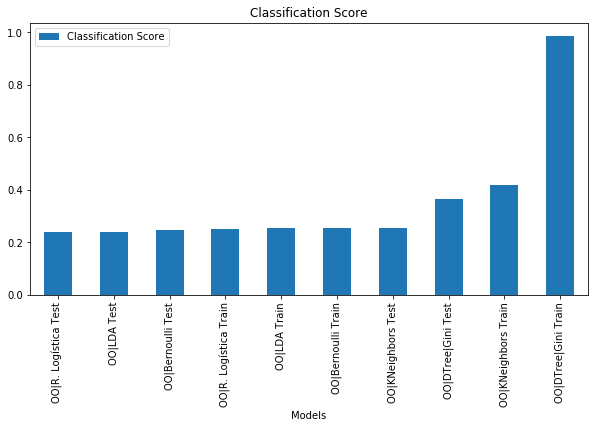

Training Accuracy: 0.986458
Test Accuracy: 0.355565
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.20      0.22      0.21         9
          1       0.43      0.23      0.30        13
          2       0.28      0.15      0.20        59
          3       0.20      0.17      0.18        83
          4       0.38      0.40      0.39       341
          5       0.40      0.41      0.41       513
          6       0.39      0.42      0.41       492
         -1       0.34      0.35      0.35       321
         -2       0.37      0.33      0.35       212
         -3       0.24      0.21      0.22       138
         -4       0.19      0.23      0.21        90
         -5       0.25      0.28      0.26        83
         -6       0.37      0.30      0.33        46

avg / total       0.35      0.36      0.35      2400

Training Accuracy: 0.252083
Test Accuracy: 0.238016
Detailed Analysis Testing Results ...
             precision

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training Accuracy: 0.481563
Test Accuracy: 0.248854
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00        13
          2       0.08      0.07      0.07        59
          3       0.10      0.10      0.10        83
          4       0.22      0.29      0.25       341
          5       0.30      0.35      0.32       513
          6       0.28      0.34      0.31       492
         -1       0.25      0.21      0.23       321
         -2       0.34      0.25      0.29       212
         -3       0.13      0.06      0.08       138
         -4       0.05      0.02      0.03        90
         -5       0.09      0.04      0.05        83
         -6       0.16      0.07      0.09        46

avg / total       0.24      0.25      0.24      2400

Training Accuracy: 0.253958
Test Accuracy: 0.247603
Detailed Analysis Testing Results ...
             precision

In [21]:
models_ovsr = {"OR|DTree|Gini":OneVsRestClassifier(Tree(criterion='gini',splitter='best')), "OR|R. Logística":OneVsRestClassifier(LR()), "OR|KNeighbors":OneVsRestClassifier(KNeighborsClassifier()), "OR|Bernoulli":OneVsRestClassifier(BernoulliNB()), "OR|LDA":OneVsRestClassifier(LDA())}
scores_ovsr = compare_models(models_ovsr, X_train_mc_vec_pca, X_test_mc_vec_pca, y_train_mc, y_test_mc)
for label ,model in models_mc.items():
    score_the_model(model, X_train_mc_vec_pca, y_train_mc, X_test_mc_vec_pca, y_test_mc, ["0","1", "2", "3", "4" , "5", "6", "-1", "-2", "-3", "-4", "-5", "-6"])
models_ovso = {"OO|DTree|Gini":OneVsOneClassifier(Tree(criterion='gini',splitter='best')), "OO|R. Logística":OneVsOneClassifier(LR()), "OO|KNeighbors":OneVsOneClassifier(KNeighborsClassifier()), "OO|Bernoulli":OneVsOneClassifier(BernoulliNB()), "OO|LDA":OneVsOneClassifier(LDA())}
scores_ovso = compare_models(models_ovso, X_train_mc_vec_pca, X_test_mc_vec_pca, y_train_mc, y_test_mc)
for label ,model in models_mc.items():
    score_the_model(model, X_train_mc_vec_pca, y_train_mc, X_test_mc_vec_pca, y_test_mc, ["0","1", "2", "3", "4" , "5", "6", "-1", "-2", "-3", "-4", "-5", "-6"])

#### (l) Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases. Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

#### Respuesta

Se observa que en el conjunto de test, OneVsAll tiene un leve peor rendimiento que Multinomial, resultado que se invierte en el conjunto de entrenamiento.

Por otro lado, el f1-score de ambos modelos sigue siendo muy malo, de 0.17, implicando que a nivel global y sin importar el conjunto su rendimiento es malo, no siendo una clasificación confiable.

#### Código

Score OVR|R. Logística Train: 0.252083
Score OVR|R. Logística Test: 0.237917
Score Multinomial|R. Logística Train: 0.250833
Score Multinomial|R. Logística Test: 0.238750


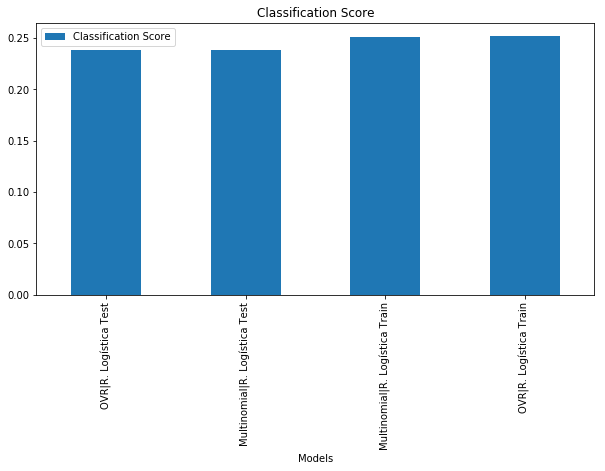

Training Accuracy: 0.252083
Test Accuracy: 0.238016
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00        13
          2       0.00      0.00      0.00        59
          3       0.00      0.00      0.00        83
          4       0.00      0.00      0.00       341
          5       0.25      0.34      0.29       513
          6       0.22      0.70      0.34       492
         -1       0.25      0.07      0.11       321
         -2       0.41      0.15      0.22       212
         -3       0.00      0.00      0.00       138
         -4       0.00      0.00      0.00        90
         -5       0.00      0.00      0.00        83
         -6       0.00      0.00      0.00        46

avg / total       0.17      0.24      0.17      2400

Training Accuracy: 0.250833
Test Accuracy: 0.238850
Detailed Analysis Testing Results ...
             precision

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
models_LR ={"OVR|R. Logística":LR(multi_class='ovr', solver="newton-cg"),"Multinomial|R. Logística":LR(multi_class='multinomial', solver="newton-cg")}
scores_LR = compare_models(models_LR, X_train_mc_vec_pca, X_test_mc_vec_pca, y_train_mc, y_test_mc)
for label ,model in models_LR.items():
    score_the_model(model, X_train_mc_vec_pca, y_train_mc, X_test_mc_vec_pca, y_test_mc, ["0","1", "2", "3", "4" , "5", "6", "-1", "-2", "-3", "-4", "-5", "-6"])



#### (m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?

#### Respuesta

Dada la evidencia, se puede observar que ningún método logró un resultado muy sobresaliente. Sin embargo, se puede notar que los métodos que funcionaron mejor con el conjunto de test fueron claramente los árboles, en este caso todos Gini. 

También se observa algo interesante referente a que en muchos casos se dio que un método en el conjunto de test tuvo, aunque marginal, mejor rendimiento que el de entrenamiento. Es el caso de la regresión logística, bernoulli y LDA. 

Respondiendo a la pregunta, si se da en segir teniendo el mejor desempeño. Esto see puede ver claramente en el resultado obtenido con los árboles. El que le sigue es regresión logística, y tambíen mantiene su desempeño en múltiples clases.

Luego de estos el score se vuelve muy parejo para todos los métodos, por lo tanto no consideramos relevante basarnos en ellos para responder la pregunta.

Ahora, cabe preguntarse si todos estos clasificadores mejorarían con un mejor preprocesamiento de los datos, ya que al ser todos muy iguales en su score, se puede suponer que estan siendo afectados por los mismo problemas, siendo la raiz común de todos ellos el preprocesamiento del dataset.

#### Código

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Score DTree|Gini Train: 0.986458
Score DTree|Gini Test: 0.355417
Score R. Logística Train: 0.252083
Score R. Logística Test: 0.237917
Score KNeighbors Train: 0.481563
Score KNeighbors Test: 0.248750
Score Bernoulli Train: 0.253958
Score Bernoulli Test: 0.247500
Score LDA Train: 0.252604
Score LDA Test: 0.240833
Score OR|DTree|Gini Train: 0.986458
Score OR|DTree|Gini Test: 0.307500
Score OR|R. Logística Train: 0.252083
Score OR|R. Logística Test: 0.237917
Score OR|KNeighbors Train: 0.483229
Score OR|KNeighbors Test: 0.240417
Score OR|Bernoulli Train: 0.253958
Score OR|Bernoulli Test: 0.247500
Score OR|LDA Train: 0.252083
Score OR|LDA Test: 0.239583
Score OO|DTree|Gini Train: 0.986458
Score OO|DTree|Gini Test: 0.365000
Score OO|R. Logística Train: 0.252083
Score OO|R. Logística Test: 0.237917
Score OO|KNeighbors Train: 0.416250
Score OO|KNeighbors Test: 0.255833
Score OO|Bernoulli Train: 0.253958
Score OO|Bernoulli Test: 0.247500
Score OO|LDA Train: 0.252292
Score OO|LDA Test: 0.239167
S

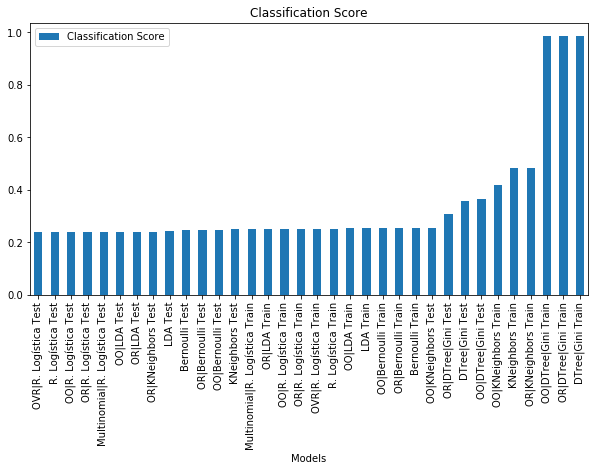

Training Accuracy: 0.986458
Test Accuracy: 0.355565
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.25      0.22      0.24         9
          1       0.43      0.23      0.30        13
          2       0.23      0.15      0.18        59
          3       0.22      0.18      0.20        83
          4       0.39      0.39      0.39       341
          5       0.40      0.40      0.40       513
          6       0.38      0.41      0.40       492
         -1       0.37      0.36      0.37       321
         -2       0.34      0.35      0.34       212
         -3       0.27      0.21      0.24       138
         -4       0.21      0.26      0.23        90
         -5       0.27      0.30      0.29        83
         -6       0.27      0.28      0.28        46

avg / total       0.35      0.36      0.35      2400

Training Accuracy: 0.252083
Test Accuracy: 0.238016
Detailed Analysis Testing Results ...
             precision

/Users/nano/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Training Accuracy: 0.481563
Test Accuracy: 0.248854
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00        13
          2       0.08      0.07      0.07        59
          3       0.10      0.10      0.10        83
          4       0.22      0.29      0.25       341
          5       0.30      0.35      0.32       513
          6       0.28      0.34      0.31       492
         -1       0.25      0.21      0.23       321
         -2       0.34      0.25      0.29       212
         -3       0.13      0.06      0.08       138
         -4       0.05      0.02      0.03        90
         -5       0.09      0.04      0.05        83
         -6       0.16      0.07      0.09        46

avg / total       0.24      0.25      0.24      2400

Training Accuracy: 0.253958
Test Accuracy: 0.247603
Detailed Analysis Testing Results ...
             precision

Training Accuracy: 0.416250
Test Accuracy: 0.255940
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.00      0.00      0.00        13
          2       0.00      0.00      0.00        59
          3       0.10      0.04      0.05        83
          4       0.20      0.20      0.20       341
          5       0.29      0.37      0.32       513
          6       0.27      0.41      0.33       492
         -1       0.25      0.25      0.25       321
         -2       0.33      0.29      0.31       212
         -3       0.11      0.06      0.08       138
         -4       0.07      0.04      0.06        90
         -5       0.11      0.02      0.04        83
         -6       0.10      0.02      0.04        46

avg / total       0.23      0.26      0.24      2400

Training Accuracy: 0.253958
Test Accuracy: 0.247603
Detailed Analysis Testing Results ...
             precision

In [23]:
allModels = dict(dict(dict(models_mc, **models_ovsr), **models_ovso), **models_LR)
scores_allModels = compare_models(allModels, X_train_mc_vec_pca, X_test_mc_vec_pca, y_train_mc, y_test_mc)
for label ,model in allModels.items():
    score_the_model(model, X_train_mc_vec_pca, y_train_mc, X_test_mc_vec_pca, y_test_mc, ["0","1", "2", "3", "4" , "5", "6", "-1", "-2", "-3", "-4", "-5", "-6"])
